#**Optimizing Revenue and Efficiency: A Data-Driven Analysis of NYC Taxi Operations**

_____

##**01. Introduction**

###**1. Background**
The New York City Taxi and Limousine Commission (TLC) was established in 1971 to oversee and regulate all for-hire ground transportation services in NYC, including yellow medallion taxis, for-hire vehicles (FHVs) like black cars and limousines, commuter vans, and paratransit vehicles.

As of 2025, the TLC oversees a fleet of over 200,000 licensed drivers and vehicles, which collectively handle around 1 million trips daily across the five boroughs. To ensure safety and quality, all TLC drivers are required to:
- Pass background checks
- Maintain a clean driving record
- Complete 24 hours of professional training

Vehicles must also meet stringent safety and emissions standards, with regular inspections conducted at TLC’s Woodside Inspection Facility.

Knowing that it is a staple transportation used in New York City for the past 50 years, the industry and market dynamic has been changing. There are several reasons it is now being reconsidered both by the driver and the passengers:

**A. Industry Decline & Medallion Value Drop**

NYC’s regulated taxi industry consists of approximately 13,600 medallions, which once sold for over $1 million in the early 2010s.

As of 2025, medallion resale prices have sharply decreased, now ranging around 90,000–200,000 dollars

**B. Persistent Competition from Ride-Hailing (Online Transportantion)**

Uber and Lyft currently account for nearly 80% of all for-hire trips in NYC as of January 2025. Traditional taxi ridership continues to decline in both trip volume and driver revenue.

**C. Financial Pressure on Drivers and Owners**

Calendar-year medallion transfers rose from 777 in 2023 to 1,003 in 2024, this could mean a distressed sales and market volatility. Also, the average net income per yellow cab dropped to under $21/hour, representing a ~25% decrease compared to prior years

Thus, faced with collapsing medallion values and shrinking driver income, taxis must maximize revenue per trip. Management also needs to look that optimizing fleet allocation and minimizing idle time is now more critical than ever to stay competitive in the market.

###**2. Problem Statement**

How can the NYC Taxi & Limousine Commission increase profitability while improving the operational efficiency of its taxi fleet?

###**3. Objectives**
This problem statement can be answered by objectives that we want to achieve from 2 angles:

**A. Revenue Optimization**

Problem: How can we maximize revenue by identifying which pickup zones and time slots consistently generate the most income?

Objectives:

1. Identify high-revenue pickup zones.
2. Identify high-revenue time slots (hour of day, day of week).
3. Calculate and visualize Revenue per Mile and Revenue per Minute.

**B. Operational Efficiency**

Problem: How can we identify inefficiencies in trip operations (e.g., low-speed trips, short idle trips, underutilized zones) to improve service delivery and reduce resource waste?

Objectives:
1. Analyze trip duration and trip speed to identify traffic or operational delays.
2. Examine zone-wise performance in terms of average speed and trip time.
3. Identify underutilized zones or low-efficiency time slots.

##**02. Data Understanding & Preparation**

###**1. Import Packages & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
from google.colab import files

upload = files.upload()

Saving NYC TLC Trip Record.csv to NYC TLC Trip Record.csv


###**2. Understanding Dataset**

####**About Dataset**
To understand the Dataset more, below are the description for each column that is being provided from the source. This description info will help us to get the sense and understand any answers, especially if it is being stored in a "code" format.

| Column  | Description|
|-------- |----------------------|
| VendorID | A code indicating the LPEP provider that provided the record. (1 = Creative Mobile Technologies, LLC. 2 = VeriFone Inc.)  |
| lpep_pickup_datetime |  The date and time when the meter was engaged. |
| lpep_dropoff_datetime | The date and time when the meter was disengaged.|
| Passenger_count | The number of passengers in the vehicle. This is a driver-entered value.|
| Trip_distance |The elapsed trip distance in miles was reported by the taximeter. |
| PULocationID|TLC Taxi Zone in which the taximeter was engaged. |
| DOLocationID |TLC Taxi Zone in which the taximeter was disengaged. |
| RateCodeID |The final rate code is in effect at the end of the trip. (1 = Standard rate, 2 =JFK, 3 =Newark, 4 =Nassau or Westchester, 5 =Negotiated fare, 6 =Group ride)|
| Store_and_fwd_flag |This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. (Y = store and forward trip, N = not a store and forward trip) |
| Payment_type |A numeric code signifying how the passenger paid for the trip. (1 = Credit card, 2 = Cash, 3 = No charge, 4 = Dispute, 5 = Unknown, 6 = Voided trip) |
| Fare_amount | The time-and-distance fare is calculated by the meter. Extra Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 dollar rush hour and overnight charges.|
| MTA_tax |$0.50 MTA tax that is automatically triggered based on the metered rate in use.|
|Improvement_surcharge|0.30 dollars improvement surcharge assessed on hailed trips at the flag drop. The improvement surcharge began being levied in 2015|
| Tip_amount | This field is automatically populated for credit card tips. Cash tips are not included.|
| Tolls_amount | The total amount of all tolls paid in the trip.|
| Total_amount | The total amount charged to passengers. Does not include cash tips.|
| Trip_type| A code indicating whether the trip was a street hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver. (1 = Street-hail, 2 = Dispatch) |



####**Read Dataset**

In [3]:
trip_data = pd.read_csv('NYC TLC Trip Record.csv')
trip_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


####**Dataset Description**


In [4]:
# Display basic information about the dataset

trip_data.info(), trip_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

(None,
    VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
 0         2  2023-01-01 00:26:10   2023-01-01 00:37:11                  N   
 1         2  2023-01-01 00:51:03   2023-01-01 00:57:49                  N   
 2         2  2023-01-01 00:35:12   2023-01-01 00:41:32                  N   
 3         1  2023-01-01 00:13:14   2023-01-01 00:19:03                  N   
 4         1  2023-01-01 00:33:04   2023-01-01 00:39:02                  N   
 
    RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
 0         1.0           166           143              1.0           2.58   
 1         1.0            24            43              1.0           1.81   
 2         1.0           223           179              1.0           0.00   
 3         1.0            41           238              1.0           1.30   
 4         1.0            41            74              1.0           1.10   
 
    fare_amount  extra  mta_tax  tip_amount  tolls_am

In [5]:
# Display descriptive statistic for the dataset
display(trip_data.describe(include="number"))
display(trip_data.describe(include="object"))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
# Display unique values in each columns

summary = []

# Loop through each column
for i in trip_data.columns:
    unique_values = trip_data[i].unique()
    summary.append({
        "Column Name": i,
        "# Unique Values": len(unique_values),
        "Unique Values": unique_values
    })

# Convert to DataFrame for display
unique_summary = pd.DataFrame(summary)

display(unique_summary)


,Column Name,# Unique Values,Unique Values
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,3,"[N, Y, nan]"
4,RatecodeID,7,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,11,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Based on the descriptive information and unique values, below are the first conclusion that can be understood from the current data:

**Based on Data Types**
1. lpep_pickup_datetime	and 	lpep_dropoff_datetime is in object type data. Thus, to make a better analysis, we should change this into datetime
2. RatecodeID, passenger_count, payment_type, and trip_type is currently in float data type. It should be integer

**Based on Data Range (Outliers)**
1. Passenger_count showed values that is more than appropriate passenger capacity for a taxi (more than 6 person). Thus, this needs to be look further
2. trip_distance showed 0, negative values and unsually long distance (example: >100 miles) more than the mean of trip_distance
3. fare_amount showed 0, negative values and unsually high fares (example: >$500)
4. total_amount and tip_amount minimum value showed **negative** values which doesn't makes sense to get minum revenue of money from a trip
5. RatecodeID showed out of range value (99). It should be ranging only from 1-6

**Missing Values**
1. store_and_fwd_flag, RatecodeID, payment_type, trip_type, congestion_surcharge, and ehail_fee showed missing values indicated by "NaN"

Every condition from this current dataset, needs to be treated properly with data pre processing and cleaning.

##**03. Data Cleaning & Pre-processing**

###**Data Merge to Look Up Zone**

Since Pick Up Location ID and Drop Off Location ID still in ID Format, there is a look up to know specifically which zones are the Pick Up and Drop Off Location. It makes analysis easier to understand.

Source: https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

In [7]:
# Import Data Look Up Zone
from google.colab import files

upload = files.upload()

Saving taxi_zone_lookup.csv to taxi_zone_lookup.csv


In [9]:
df_zones = pd.read_csv("taxi_zone_lookup.csv")

In [10]:
# Merge
trip_data = trip_data.merge(df_zones.rename(columns={
    'LocationID': 'PULocationID',
    'Borough': 'pickup_borough',
    'Zone': 'pickup_zone',
    'service_zone': 'pickup_service_zone'
}), on='PULocationID', how='left')

# Merge dropoff zone information
trip_data = trip_data.merge(df_zones.rename(columns={
    'LocationID': 'DOLocationID',
    'Borough': 'dropoff_borough',
    'Zone': 'dropoff_zone',
    'service_zone': 'dropoff_service_zone'
}), on='DOLocationID', how='left')

# Check a few enriched rows
trip_data[['PULocationID', 'pickup_borough', 'pickup_zone', 'DOLocationID', 'dropoff_borough', 'dropoff_zone']].head()

,PULocationID,pickup_borough,pickup_zone,DOLocationID,dropoff_borough,dropoff_zone
0,166,Manhattan,Morningside Heights,143,Manhattan,Lincoln Square West
1,24,Manhattan,Bloomingdale,43,Manhattan,Central Park
2,223,Queens,Steinway,179,Queens,Old Astoria
3,41,Manhattan,Central Harlem,238,Manhattan,Upper West Side North
4,41,Manhattan,Central Harlem,74,Manhattan,East Harlem North


In [11]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [13]:
# Display unique values in each columns

summary = []

# Loop through each column
for i in trip_data.columns:
    unique_values = trip_data[i].unique()
    summary.append({
        "Column Name": i,
        "# Unique Values": len(unique_values),
        "Unique Values": unique_values
    })

# Convert to DataFrame for display
unique_summary = pd.DataFrame(summary)

display(unique_summary)

,Column Name,# Unique Values,Unique Values
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,3,"[N, Y, nan]"
4,RatecodeID,7,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,11,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


###**Data Type Conversion**

In [14]:
# Convert to datetime
trip_data['lpep_pickup_datetime'] = pd.to_datetime(trip_data['lpep_pickup_datetime'], errors='coerce')
trip_data['lpep_dropoff_datetime'] = pd.to_datetime(trip_data['lpep_dropoff_datetime'], errors='coerce')

# Convert to Integer
trip_data['RatecodeID'] = trip_data['RatecodeID'].astype('Int64')
trip_data['passenger_count'] = trip_data['passenger_count'].astype('Int64')
trip_data['payment_type'] = trip_data['payment_type'].astype('Int64')
trip_data['trip_type'] = trip_data['trip_type'].astype('Int64')

In [15]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  Int64         
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  Int64         
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

###**Duplicated Data**

In [16]:
# Check for duplicate rows, especially same datetime + location

trip_data.duplicated().sum()

# Showed 0 duplicated data

0

###**Missing Values Treatment**

####**Check Missing Values in Each Column**

In [17]:
trip_data.isna().sum()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,4324
RatecodeID,4324
PULocationID,0
DOLocationID,0
passenger_count,4324
trip_distance,0
fare_amount,0


In [18]:
# Total missing values per column
missing_count = trip_data.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(trip_data)) * 100

# Combine into one DataFrame
missing_table = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
})

# Sort by highest percentage
missing_table = missing_table.sort_values(by='Percentage (%)', ascending=False)

# Display the table
total_missing = trip_data.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

total_cells = trip_data.shape[0] * trip_data.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"Percentage of missing data: {missing_percentage:.2f}%")

missing_table

Total missing values in dataset: 95903
Percentage of missing data: 5.41%


,Missing Values,Percentage (%)
ehail_fee,68211,100.00
trip_type,4334,6.35
store_and_fwd_flag,4324,6.34
RatecodeID,4324,6.34
passenger_count,4324,6.34
congestion_surcharge,4324,6.34
payment_type,4324,6.34
dropoff_service_zone,668,0.98
dropoff_zone,426,0.62
dropoff_borough,242,0.35


ehail_fee with 100% missing value could be drop, while trip_type, store_and_fwd_flag, RatecodeID, congestion_surcharge, payment_type, passenger_count with 6.34% and 6.35% missing values can be treated by imputation

####**Drop Missing Values Column**

There is one column (ehail_fee) that has 100% missing value, thus we drop the column.



In [19]:
trip_data.drop('ehail_fee', axis= 1 ,inplace= True)

####**Imputation for Missing Values**

######**trip_type**

In the NYC TLC dataset, the trip_type column typically has:

1 → Street-hail

2 → Dispatch (pre-booked)

Sometimes 0 or NaN → Unknown or missing

Treatment: Fill with Most Frequent (Mode), assuming most trips are hailed on the street (common in NYC):

In [20]:
trip_data['trip_type'].value_counts(dropna=False)

,count
trip_type,
1,62476
<NA>,4334
2,1401


In [21]:
trip_data['trip_type'] = trip_data['trip_type'].fillna(1)

######**store_and_fwd_flag**

Missing values may mean:

- The data transmission status wasn't logged.
- GPS/device error.

In practice, most entries are 'N'.

Treatment: Fill Missing with 'N' (most common/Mode)

In [22]:
trip_data['store_and_fwd_flag'].value_counts(dropna=False)

,count
store_and_fwd_flag,
N,63579
NaN,4324
Y,308


In [23]:
trip_data.fillna({'store_and_fwd_flag':'N'}, inplace=True)

In [24]:
trip_data['store_and_fwd_flag'].isnull().sum()
trip_data['store_and_fwd_flag'].value_counts()

,count
store_and_fwd_flag,
N,67903
Y,308


######**ratecodeID**

In the NYC TLC datasets, RatecodeID is a categorical numeric column representing the fare rate rules applied to the trip.

Why might it be missing?
- Device malfunction
- Data transmission error
- Human input not recorded

Most trips in NYC use RatecodeID = 1 (standard rate), so missing values are likely just standard trips with missing entries.

Treatment: Fill Missing with 1 (Standard Rate)

In [25]:
trip_data['RatecodeID'].value_counts(dropna=False)

,count
RatecodeID,
1,62103
<NA>,4324
5,1529
2,158
4,57
3,30
99,10


In [26]:
trip_data['RatecodeID'] = trip_data['RatecodeID'].fillna(1)

######**congestion_surcharge**
On January 1st 2019, New York State’s congestion surcharge will take effect. As a result, trips in taxis and For-Hire Vehicles will be charged a surcharge for trips that start, end or pass through Congestion Zone. The Congestion Zone is Manhattan, south of 96th Street.

The charge is usually:

- $2.75 for most yellow/green taxis

- $0.00 if the trip doesn’t qualify (e.g., outside Manhattan)

Why Might It Be Missing?
- Trip occurred before 2019

- Trip was outside surcharge zone

- Data entry error or device malfunction

Since all of the data happen in 2023 (after 2019), then the next thing to do is to map out which trip happen in Manhattan.



In [27]:
# Extract year
trip_data['pickup_year'] = trip_data['lpep_pickup_datetime'].dt.year

In [28]:
# Check if pickup or dropoff is in Manhattan
trip_data['is_manhattan_trip'] = (trip_data['pickup_borough'] == 'Manhattan') | \
                                 (trip_data['dropoff_borough'] == 'Manhattan')

In [29]:
# Impute based on NYC TLC rules
trip_data['congestion_surcharge'] = trip_data.apply(
    lambda row: 2.75 if pd.isna(row['congestion_surcharge']) and
                        row['pickup_year'] >= 2019 and
                        row['is_manhattan_trip']
                else (0.0 if pd.isna(row['congestion_surcharge']) else row['congestion_surcharge']),
    axis=1
)

######**payment_type**

Since there is unknown type of payment. Thus we put the missing values as 5 (Unknown)

In [30]:
# Check distribution first
trip_data['payment_type'].value_counts(dropna=False)

,count
payment_type,
1,40686
2,22632
<NA>,4324
3,472
4,95
5,2


In [31]:
trip_data['payment_type'] = trip_data['payment_type'].fillna(5)

######**passenger_count**

This is a numerical column indicating the number of passengers in a trip. Usually ranges from 1 to 6.

Most TLC trips are solo or duo rides (1–2 people).

A missing value likely means the driver forgot to log it or the meter didn’t register it.

If the trip is valid, we can assume at least 1 passenger.

In [32]:
trip_data['passenger_count'] = trip_data['passenger_count'].fillna(trip_data['passenger_count'].median())

In [33]:
trip_data['passenger_count'].isnull().sum()
trip_data['passenger_count'].describe()

,passenger_count
count,68211.0
mean,1.295847
std,0.950635
min,0.0
25%,1.0
50%,1.0
75%,1.0
max,9.0


In [34]:
# Total missing values per column
missing_count = trip_data.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(trip_data)) * 100

# Combine into one DataFrame
check = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
})

# Display the table
total_missing = trip_data.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

total_cells = trip_data.shape[0] * trip_data.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"Percentage of missing data: {missing_percentage:.2f}%")

check

Total missing values in dataset: 1738
Percentage of missing data: 0.09%


,Missing Values,Percentage (%)
VendorID,0,0.00
lpep_pickup_datetime,0,0.00
lpep_dropoff_datetime,0,0.00
store_and_fwd_flag,0,0.00
RatecodeID,0,0.00
PULocationID,0,0.00
DOLocationID,0,0.00
passenger_count,0,0.00
trip_distance,0,0.00
fare_amount,0,0.00


####**Drop Rows for Missing Values**

In [35]:
trip_data = trip_data.dropna(subset=[
    'pickup_borough',
    'pickup_zone',
    'pickup_service_zone',
    'dropoff_borough',
    'dropoff_zone',
    'dropoff_service_zone'
])

In [36]:
# Total missing values per column
missing_count = trip_data.isnull().sum()

# Percentage of missing values
missing_percent = (missing_count / len(trip_data)) * 100

# Combine into one DataFrame
check = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent.round(2)
})

# Display the table
total_missing = trip_data.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

total_cells = trip_data.shape[0] * trip_data.shape[1]
missing_percentage = (total_missing / total_cells) * 100
print(f"Percentage of missing data: {missing_percentage:.2f}%")

check

Total missing values in dataset: 0
Percentage of missing data: 0.00%


,Missing Values,Percentage (%)
VendorID,0,0.0
lpep_pickup_datetime,0,0.0
lpep_dropoff_datetime,0,0.0
store_and_fwd_flag,0,0.0
RatecodeID,0,0.0
PULocationID,0,0.0
DOLocationID,0,0.0
passenger_count,0,0.0
trip_distance,0,0.0
fare_amount,0,0.0


###**Dropping Data Anomalies & Outliers**

#####**a. passenger_count anomalies**

In [37]:
# Checking Data Anomalies on Passenger Count

trip_data['passenger_count'].value_counts()

,count
passenger_count,
1,58007
2,5048
5,1763
6,1050
3,943
4,360
0,322
7,3
8,2


Showed that there is 336 data with 0 passenger (doesn't makes sense) and 8 datas for more than taxi capacity (>6). Thus we drop these datas

In [38]:
# Drop anomalies value for passenger_count
trip_data = trip_data[trip_data['passenger_count'] != 0]
trip_data = trip_data[trip_data['passenger_count'] <= 6]

In [39]:
trip_data['passenger_count'].value_counts()

,count
passenger_count,
1,58007
2,5048
5,1763
6,1050
3,943
4,360


#####**b. trip_distance anomalies**

In [40]:
display(trip_data['trip_distance'].describe())
display(trip_data['trip_distance'].value_counts())


,trip_distance
count,67171.000000
mean,8.175666
std,589.617217
min,0.000000
25%,1.130000
50%,1.850000
75%,3.200000
max,120098.840000


,count
trip_distance,
0.00,2955
1.40,625
1.30,568
1.20,514
1.50,483
...,...
17.99,1
19.40,1
15.03,1


There are 3154 datas with 0 distance_trip. This value is not logical for a trip distance and needs to be dropped.

But, since trip_distance can varied and not in integers form, besides 0 values, we need to find the outliers for trip distance, since there is an inidcative value for maximum distance up until 1500 miles of trip distance. Which also ilogical.

In [41]:
# Drop trip_distance with 0 values

trip_data = trip_data[trip_data['trip_distance'] != 0]

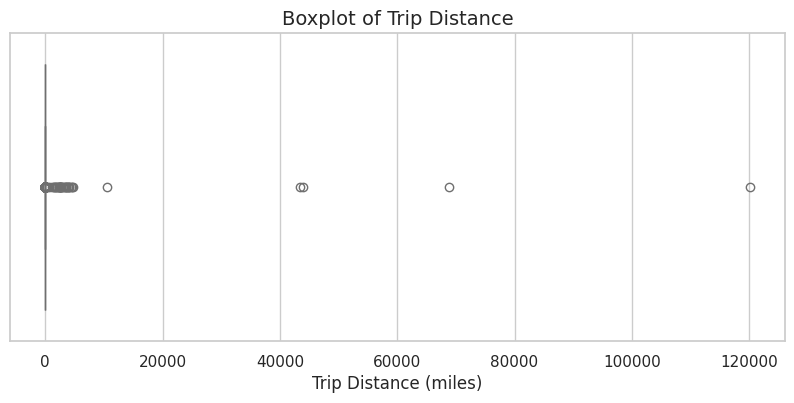

In [42]:
# Box Plot

# Set figure size and style
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x=trip_data['trip_distance'], color='skyblue')

# Add titles and labels
plt.title("Boxplot of Trip Distance", fontsize=14)
plt.xlabel("Trip Distance (miles)", fontsize=12)

# Show the plot
plt.show()

In [43]:
# IQR Method

Q1 = trip_data['trip_distance'].quantile(0.25)
Q3 = trip_data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = trip_data[ (trip_data['trip_distance'] < lower_bound) | (trip_data['trip_distance'] > upper_bound) ]
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of outliers: {len(outliers)}")

# Display the outliers
outliers[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'PULocationID', 'DOLocationID']]


Lower Bound: -1.9149999999999998
Upper Bound: 6.445
Number of outliers: 5385


,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID
12,2023-01-01 00:26:32,2023-01-01 00:45:31,7.08,75,148
15,2023-01-01 00:49:34,2023-01-01 01:08:23,11.30,195,210
17,2023-01-01 00:35:11,2023-01-01 01:17:35,8.28,97,68
32,2023-01-01 00:40:58,2023-01-01 01:04:32,6.78,66,164
35,2023-01-01 00:41:53,2023-01-01 00:41:58,6.70,83,83
...,...,...,...,...,...
68187,2023-01-31 18:35:00,2023-01-31 19:08:00,13.90,3,74
68195,2023-01-31 19:52:00,2023-01-31 20:24:00,9.61,40,238
68199,2023-01-31 19:17:00,2023-01-31 20:00:00,10.64,179,249
68201,2023-01-31 20:57:00,2023-01-31 21:17:00,6.92,166,68


From boxplot result, outlier can only been seen by some dots on the plot (thousands miles), but when validated with IQR method, 5385 outliers found after the 0 values data were dropped.

If we look at the samples, datas with trip distance ranging from 5-20 miles are also detected as outliers, meanwhile realisticly NYC Spans ~36 miles from east to west (https://www.nytimes.com/2001/07/01/nyregion/fyi-027065.html)

Thus we need other logical reasoning to treat the outliers without having to delete "supposed-to-be" useful data. Based on the source of NY Times, then we will drop the trip_distance ranging >40 miles

In [44]:
#Drop trip_distance with > 40 mile values

trip_data = trip_data[trip_data['trip_distance'] <=40]

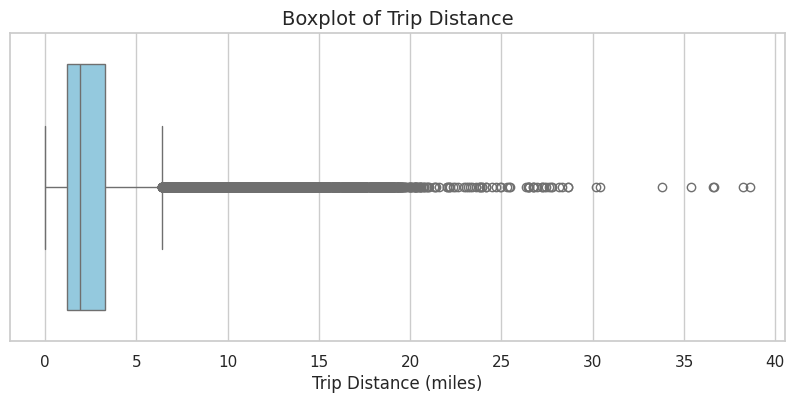

In [45]:
# Outliers treatment Box Plot

# Set figure size and style
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x=trip_data['trip_distance'], color='skyblue')
# Add titles and labels
plt.title("Boxplot of Trip Distance", fontsize=14)
plt.xlabel("Trip Distance (miles)", fontsize=12)

# Show the plot
plt.show()

#####**c. fare_amount anomalies**

In [46]:
display(trip_data['fare_amount'].describe())
display(trip_data['fare_amount'].value_counts())

,fare_amount
count,64177.000000
mean,16.249974
std,11.743557
min,-70.000000
25%,9.300000
50%,12.800000
75%,19.100000
max,455.000000


,count
fare_amount,
8.60,3100
10.00,3090
9.30,2943
7.90,2827
10.70,2762
...,...
40.79,1
21.12,1
52.42,1


Negative value spotted on fare_amount, mta_tax, tip_amount, improvement_surcharge,total_amount, dan congestion_surcharge. Drop negative values

In [47]:
trip_data = trip_data[trip_data['fare_amount'] >0]
trip_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_year
count,64057.000000,64057,64057,64057.0,64057.000000,64057.000000,64057.0,64057.000000,64057.000000,64057.000000,64057.000000,64057.00000,64057.000000,64057.000000,64057.000000,64057.0,64057.0,64057.000000,64057.000000
mean,1.883557,2023-01-16 20:39:57.045459712,2023-01-16 20:57:58.681518080,1.0705,97.057433,137.681081,1.310364,2.770245,16.291451,0.856273,0.576104,2.19275,0.148942,0.957558,21.585026,1.602901,1.011864,0.819696,2022.999750
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,3.000000,1.000000,1.0,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,1.010000,1.0,1.0,0.000000,2009.000000
25%,2.000000,2023-01-09 12:24:31,2023-01-09 12:40:28,1.0,74.000000,74.000000,1.0,1.220000,9.300000,0.000000,0.500000,0.00000,0.000000,1.000000,12.960000,1.0,1.0,0.000000,2023.000000
50%,2.000000,2023-01-17 09:16:10,2023-01-17 09:32:10,1.0,75.000000,138.000000,1.0,1.930000,12.950000,0.000000,0.500000,1.82000,0.000000,1.000000,17.880000,1.0,1.0,0.000000,2023.000000
75%,2.000000,2023-01-24 16:09:01,2023-01-24 16:27:35,1.0,116.000000,216.000000,1.0,3.310000,19.140000,1.000000,0.500000,3.41000,0.000000,1.000000,25.980000,2.0,1.0,2.750000,2023.000000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.0,263.000000,263.000000,6.0,38.600000,455.000000,7.500000,1.500000,222.22000,36.050000,1.000000,456.000000,5.0,2.0,2.750000,2023.000000
std,0.320758,NaN,NaN,1.250712,59.612462,76.151930,0.961776,2.629753,11.709674,1.278029,0.356817,2.97547,0.999793,0.167869,13.879616,1.010421,0.108277,1.257828,0.055597


#####**d. total_amount anomalies**

In [48]:
display(trip_data['total_amount'].describe())

,total_amount
count,64057.000000
mean,21.585026
std,13.879616
min,1.010000
25%,12.960000
50%,17.880000
75%,25.980000
max,456.000000


In [49]:
trip_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_year
count,64057.000000,64057,64057,64057.0,64057.000000,64057.000000,64057.0,64057.000000,64057.000000,64057.000000,64057.000000,64057.00000,64057.000000,64057.000000,64057.000000,64057.0,64057.0,64057.000000,64057.000000
mean,1.883557,2023-01-16 20:39:57.045459712,2023-01-16 20:57:58.681518080,1.0705,97.057433,137.681081,1.310364,2.770245,16.291451,0.856273,0.576104,2.19275,0.148942,0.957558,21.585026,1.602901,1.011864,0.819696,2022.999750
min,1.000000,2009-01-01 20:21:27,2009-01-02 11:07:31,1.0,3.000000,1.000000,1.0,0.010000,0.010000,0.000000,0.000000,0.00000,0.000000,0.000000,1.010000,1.0,1.0,0.000000,2009.000000
25%,2.000000,2023-01-09 12:24:31,2023-01-09 12:40:28,1.0,74.000000,74.000000,1.0,1.220000,9.300000,0.000000,0.500000,0.00000,0.000000,1.000000,12.960000,1.0,1.0,0.000000,2023.000000
50%,2.000000,2023-01-17 09:16:10,2023-01-17 09:32:10,1.0,75.000000,138.000000,1.0,1.930000,12.950000,0.000000,0.500000,1.82000,0.000000,1.000000,17.880000,1.0,1.0,0.000000,2023.000000
75%,2.000000,2023-01-24 16:09:01,2023-01-24 16:27:35,1.0,116.000000,216.000000,1.0,3.310000,19.140000,1.000000,0.500000,3.41000,0.000000,1.000000,25.980000,2.0,1.0,2.750000,2023.000000
max,2.000000,2023-02-01 03:10:05,2023-02-01 17:27:05,99.0,263.000000,263.000000,6.0,38.600000,455.000000,7.500000,1.500000,222.22000,36.050000,1.000000,456.000000,5.0,2.0,2.750000,2023.000000
std,0.320758,NaN,NaN,1.250712,59.612462,76.151930,0.961776,2.629753,11.709674,1.278029,0.356817,2.97547,0.999793,0.167869,13.879616,1.010421,0.108277,1.257828,0.055597


By droping negative values in fare_amount, it seemed that it also cleared other negative values in the other columns. thus no more negative values on the dataset.

#####**e. RatecodeID anomalies**

In [50]:
trip_data = trip_data[trip_data['RatecodeID'] != 99]
trip_data['RatecodeID'].value_counts()

,count
RatecodeID,
1,63035
5,867
2,129
3,14
4,3


###**Data Transformation**

####**Time Features**

In [51]:
# Creating new columns related to pickup datetime
trip_data['pickup_year'] = trip_data['lpep_pickup_datetime'].dt.strftime('%Y')
trip_data['pickup_month'] = trip_data['lpep_pickup_datetime'].dt.strftime('%B')
trip_data['pickup_week'] = trip_data['lpep_pickup_datetime'].dt.strftime('%U')
trip_data['pickup_day'] = trip_data['lpep_pickup_datetime'].dt.strftime('%A')
trip_data['pickup_date'] = trip_data['lpep_pickup_datetime'].dt.strftime('%d')
trip_data['pickup_hour'] = trip_data['lpep_pickup_datetime'].dt.strftime('%H')

# Add weekday number (0 = Monday)
trip_data['pickup_weekday'] = trip_data['lpep_pickup_datetime'].dt.weekday

# Weekend flag: 1 if Saturday or Sunday, else 0
trip_data['pickup_weekend'] = trip_data['pickup_weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Duration columns
trip_data['duration'] = trip_data['lpep_dropoff_datetime'] - trip_data['lpep_pickup_datetime']
trip_data['durations_minute'] = trip_data['duration'].apply(lambda x: x.total_seconds() // 60).round(2)

# Filter ilogical duration
trip_data = trip_data[(trip_data['durations_minute'] > 0) & (trip_data['durations_minute'] <= 1440)]

# Preview
trip_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,is_manhattan_trip,pickup_month,pickup_week,pickup_day,pickup_date,pickup_hour,pickup_weekday,pickup_weekend,duration,durations_minute
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,...,True,January,01,Sunday,01,00,6,1,0 days 00:11:01,11.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,...,True,January,01,Sunday,01,00,6,1,0 days 00:06:46,6.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,...,True,January,01,Sunday,01,00,6,1,0 days 00:05:49,5.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,...,True,January,01,Sunday,01,00,6,1,0 days 00:05:58,5.0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1,41,262,1,2.78,17.7,...,True,January,01,Sunday,01,00,6,1,0 days 00:17:33,17.0


####**Revenue Metrics**

In [52]:
trip_data['revenue_per_mile'] = trip_data['fare_amount'] / trip_data['trip_distance']
trip_data['revenue_per_minute'] = trip_data['fare_amount'] / trip_data['durations_minute']

####**Operational/Traffic Indicator**

In [53]:
trip_data = trip_data[trip_data['durations_minute'] > 0]
trip_data['trip_speed_mph'] = trip_data['trip_distance'] / (trip_data['durations_minute'] / 60)

####**Zone Pair**

In [54]:
trip_data['zone_pair'] = trip_data['pickup_zone'] + " → " + trip_data['dropoff_zone']

####**Fare per Passenger**

In [55]:
trip_data['fare_per_passenger'] = trip_data['fare_amount'] / trip_data['passenger_count']

In [56]:
trip_data.to_csv('cleaned_trip_data.csv', index=False)

##**04. Data Analysis**

Data analysis is now conducted to answer these problem statements

**A. Revenue Optimization**

Problem: Revenue per trip varies significantly based on time, location, and trip type. Identifying patterns can guide pricing, marketing, or resource allocation strategies.

Objectives:

- Identify high-revenue pickup zones and time slots.
- Understand which trips generate the most revenue per mile or per minute
- Explore seasonal or hourly trends to optimize supply.
- Identify peak times and zones that generate the highest revenue.
- Analyze tipping behavior based on trip and temporal variables.

**B. Operational Efficiency**

Problem: Idle time, long trip durations, or low trip density in certain zones lead to inefficiency.

Objectives:
- Analyze trip durations and distances by time and area to detect inefficiencies or congestion.
- Identify zones with the highest and lowest trip volume
- Discover underutilized times or zones with long idle durations.
- Evaluate driver performance using fare per minute or mile.
- Identify zones with high revenue potential and optimize route strategies



####**Univariate Analysis**

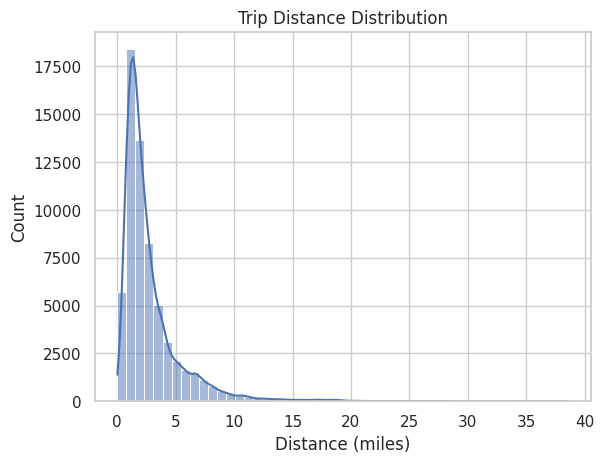

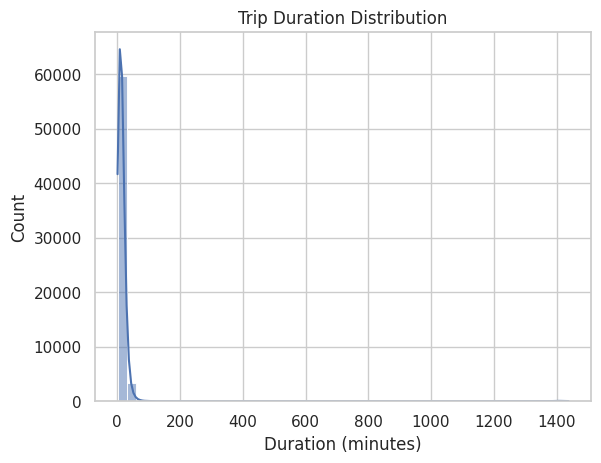

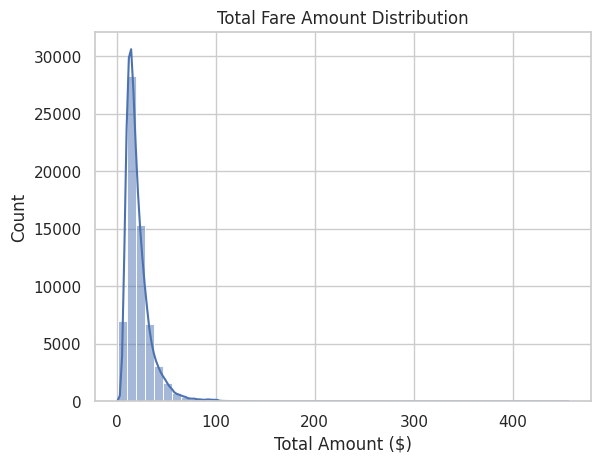

In [57]:
# Trip Distance Distribution
sns.histplot(trip_data['trip_distance'], bins=50, kde=True)
plt.title('Trip Distance Distribution')
plt.xlabel('Distance (miles)')
plt.show()

# Trip Duration Distribution
sns.histplot(trip_data['durations_minute'], bins=50, kde=True)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.show()

# Total Fare Amount Distribution
sns.histplot(trip_data['total_amount'], bins=50, kde=True)
plt.title('Total Fare Amount Distribution')
plt.xlabel('Total Amount ($)')
plt.show()

####**Trips based on Time (Hour and Week)**

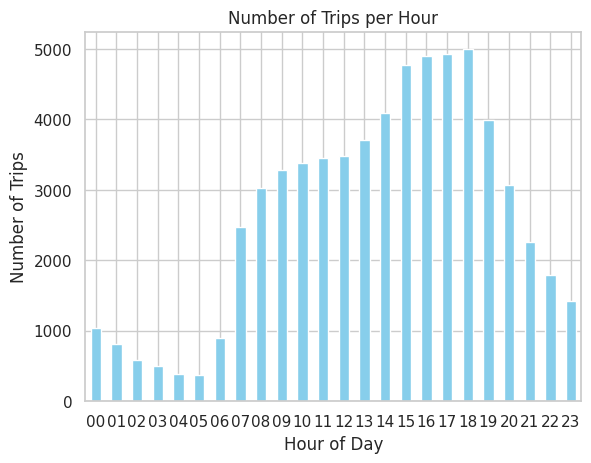

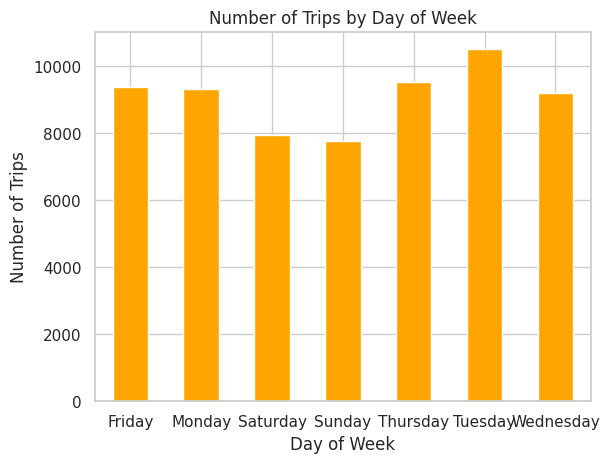

In [58]:
import matplotlib.pyplot as plt

# Trips per hour
hourly_counts = trip_data['pickup_hour'].value_counts().sort_index()
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()

# Trips per day of week
dow_counts = trip_data['pickup_day'].value_counts().sort_index()
dow_counts.plot(kind='bar', color='orange')
plt.title('Number of Trips by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.show()


The peak number of trips happen:
- On Tuesday
- Usually start from 3PM - 6PM, most probably because of end of working hours and people are on their way to home

####**Top Pick Up and Drop Off Zones and Borough**

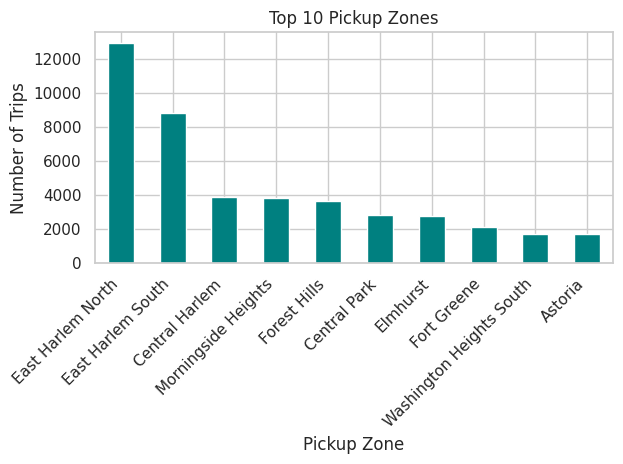

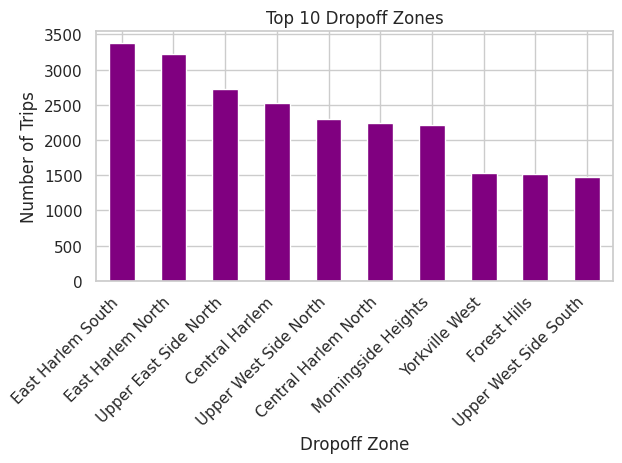

In [59]:
# Top 10 Pickup Zones
top_pickup_zones = trip_data['pickup_zone'].value_counts().head(10)
top_pickup_zones.plot(kind='bar', color='teal')
plt.title('Top 10 Pickup Zones')
plt.xlabel('Pickup Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 Dropoff Zones
top_dropoff_zones = trip_data['dropoff_zone'].value_counts().head(10)
top_dropoff_zones.plot(kind='bar', color='purple')
plt.title('Top 10 Dropoff Zones')
plt.xlabel('Dropoff Zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

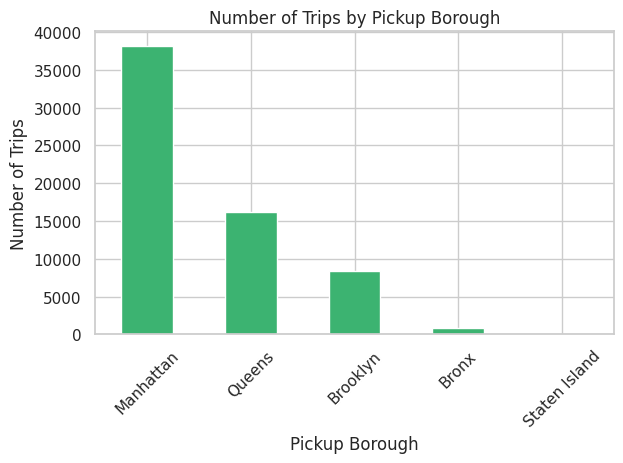

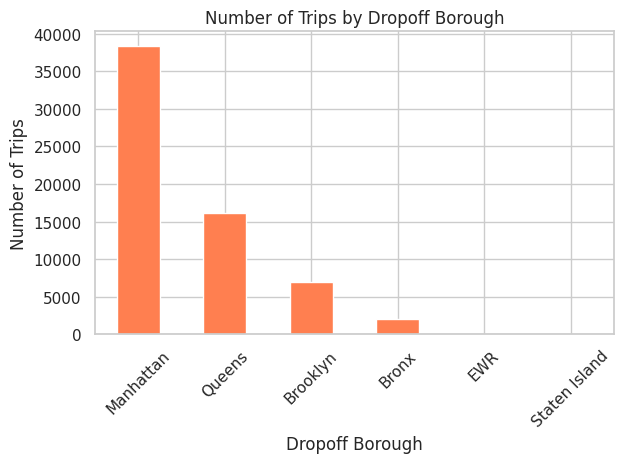

In [60]:
# Top Pickup Boroughs
top_pickup_boroughs = trip_data['pickup_borough'].value_counts()
top_pickup_boroughs.plot(kind='bar', color='mediumseagreen')
plt.title('Number of Trips by Pickup Borough')
plt.xlabel('Pickup Borough')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top Dropoff Boroughs
top_dropoff_boroughs = trip_data['dropoff_borough'].value_counts()
top_dropoff_boroughs.plot(kind='bar', color='coral')
plt.title('Number of Trips by Dropoff Borough')
plt.xlabel('Dropoff Borough')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####**Trips by Borough and Day**

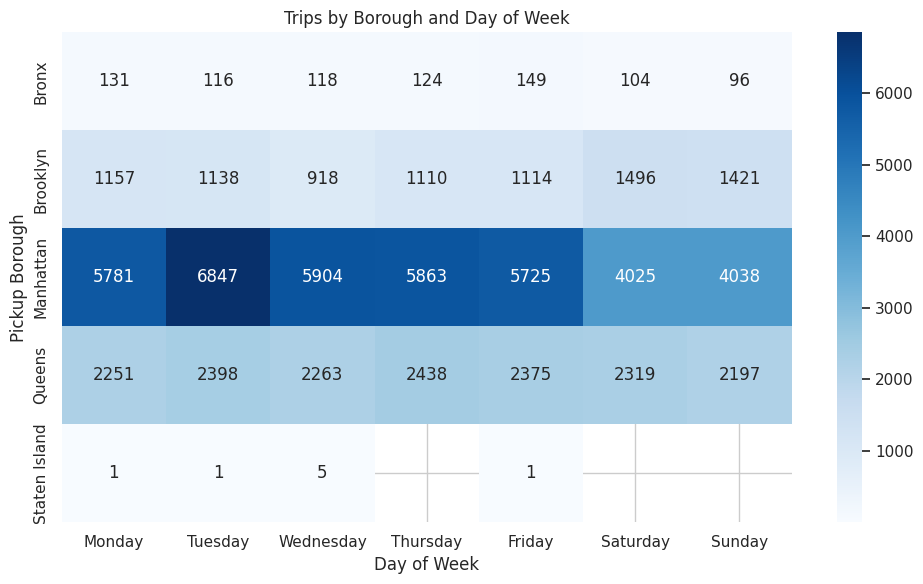

In [61]:
# Group and pivot by pickup_borough and pickup_day
borough_day = trip_data.groupby(['pickup_borough', 'pickup_day']).size().reset_index(name='trip_count')
borough_day_pivot = borough_day.pivot(index='pickup_borough', columns='pickup_day', values='trip_count')

# Optional: Order the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
borough_day_pivot = borough_day_pivot[ordered_days]

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(borough_day_pivot, annot=True, fmt='.0f', cmap='Blues')
plt.title('Trips by Borough and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Pickup Borough')
plt.tight_layout()
plt.show()

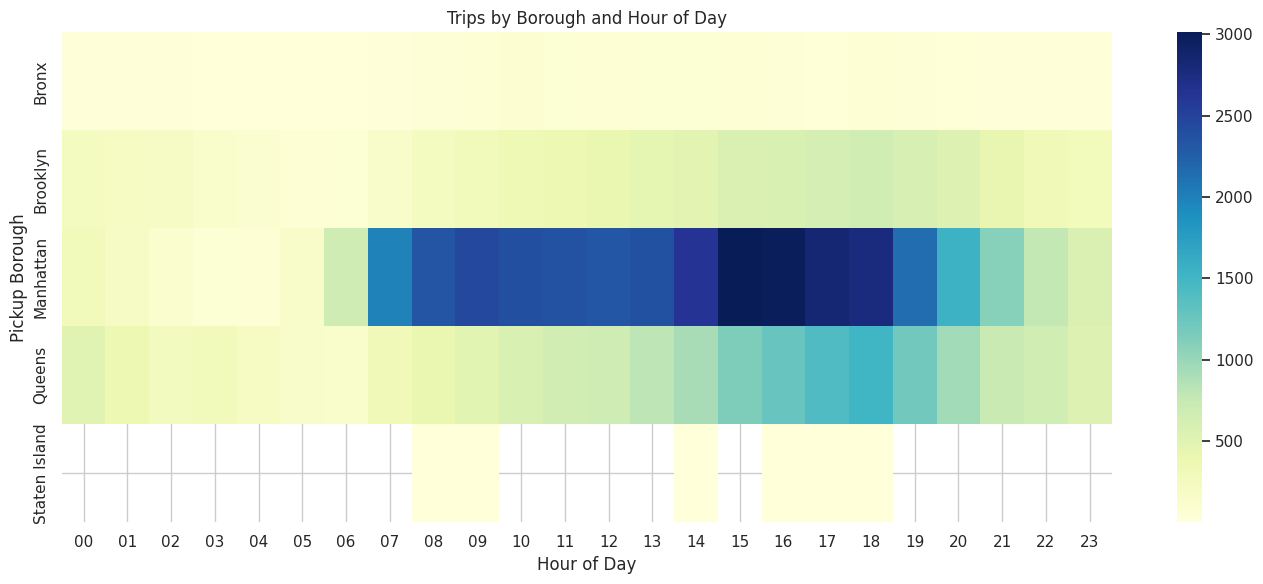

In [62]:
# Group and pivot by pickup_borough and pickup_hour
borough_hour = trip_data.groupby(['pickup_borough', 'pickup_hour']).size().reset_index(name='trip_count')
borough_hour_pivot = borough_hour.pivot(index='pickup_borough', columns='pickup_hour', values='trip_count')

# Plot
plt.figure(figsize=(14, 6))
sns.heatmap(borough_hour_pivot, annot=False, cmap='YlGnBu')
plt.title('Trips by Borough and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Pickup Borough')
plt.tight_layout()
plt.show()

###**EDA Basics**

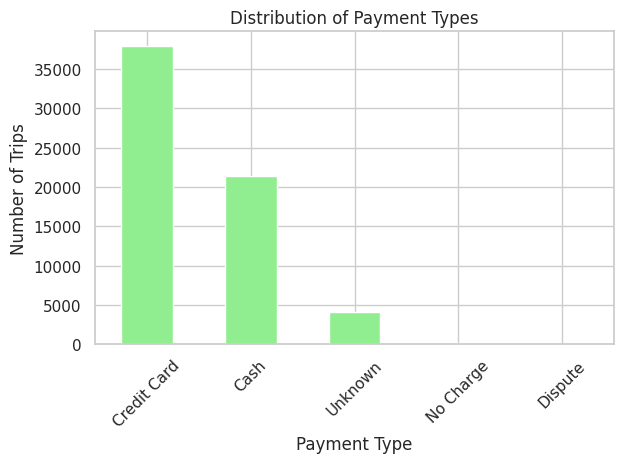

In [63]:
# mapping
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided'
}
trip_data['payment_label'] = trip_data['payment_type'].map(payment_map)

# Plot using mapped labels
trip_data['payment_label'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

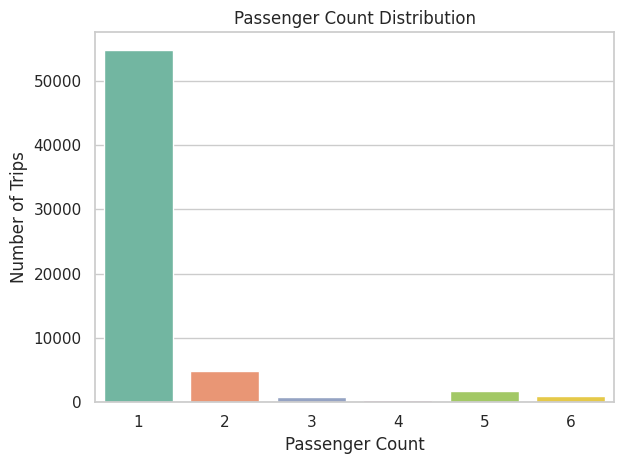

In [64]:
sns.countplot(x='passenger_count', data=trip_data, palette='Set2')
plt.title('Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()


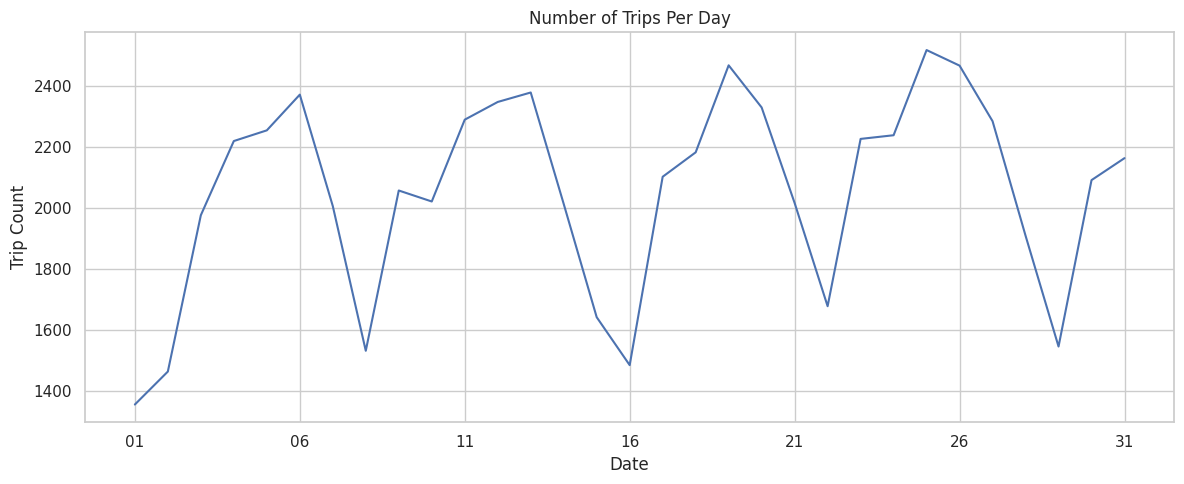

In [65]:
# Group by date
daily_trips = trip_data.groupby('pickup_date').size()

# Plot
daily_trips.plot(figsize=(12, 5))
plt.title('Number of Trips Per Day')
plt.xlabel('Date')
plt.ylabel('Trip Count')
plt.grid(True)
plt.tight_layout()
plt.show()

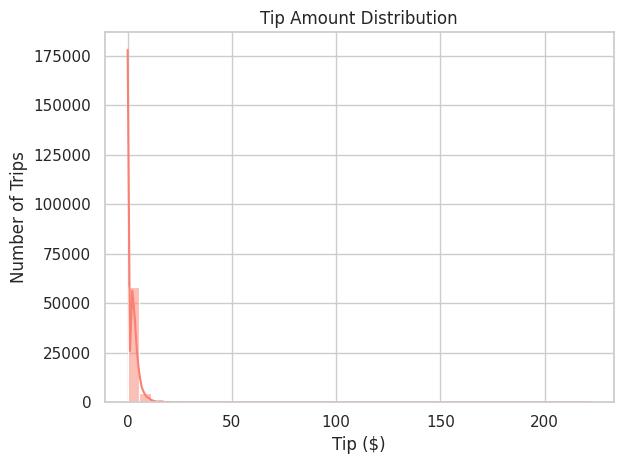

In [66]:
sns.histplot(trip_data['tip_amount'], bins=40, kde=True, color='salmon')
plt.title('Tip Amount Distribution')
plt.xlabel('Tip ($)')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

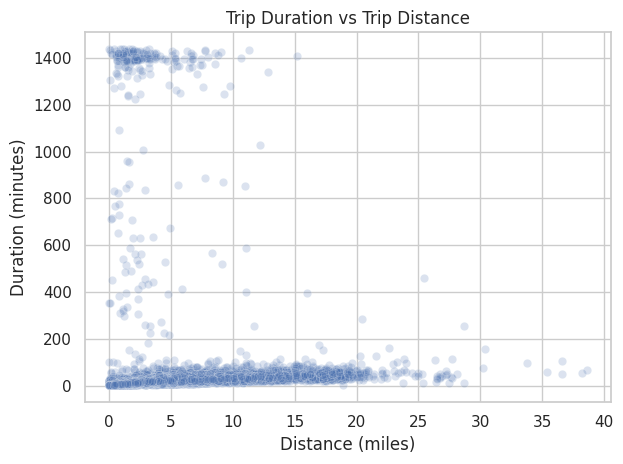

In [67]:
sns.scatterplot(data=trip_data, x='trip_distance', y='durations_minute', alpha=0.2)
plt.title('Trip Duration vs Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.tight_layout()
plt.show()

##**Revenue Optimization**

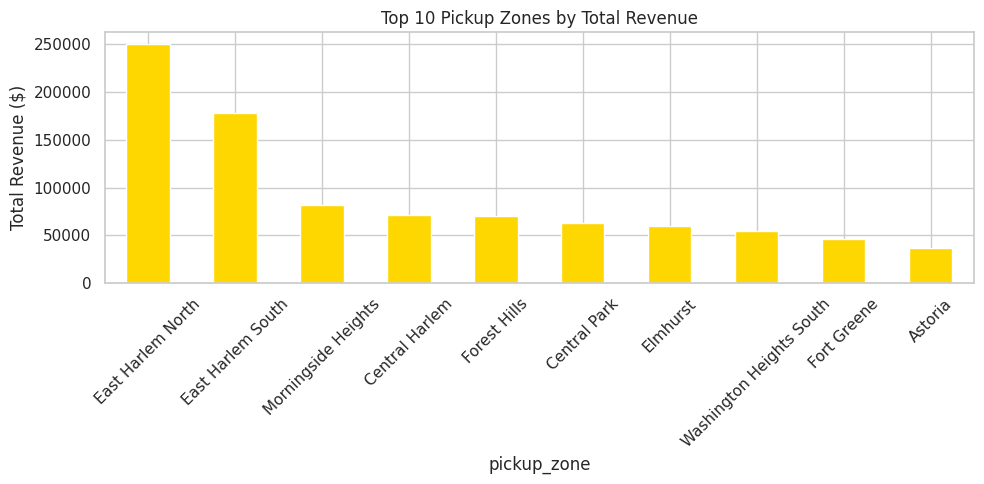

In [70]:
# Total revenue per zone
zone_rev = trip_data.groupby('pickup_zone')['total_amount'].sum().sort_values(ascending=False).head(10)

zone_rev.plot(kind='bar', figsize=(10, 5), color='gold')
plt.title('Top 10 Pickup Zones by Total Revenue')
plt.xlabel('pickup_zone')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

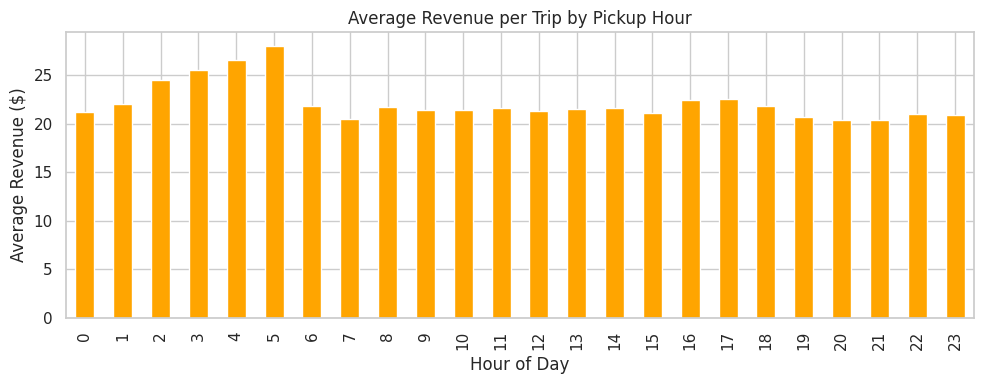

In [71]:
# Group by pickup hour and calculate average total_amount
hour_rev = trip_data.groupby(trip_data['lpep_pickup_datetime'].dt.hour)['total_amount'].mean()

# Plot
hour_rev.plot(kind='bar', figsize=(10, 4), color='orange')
plt.title('Average Revenue per Trip by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

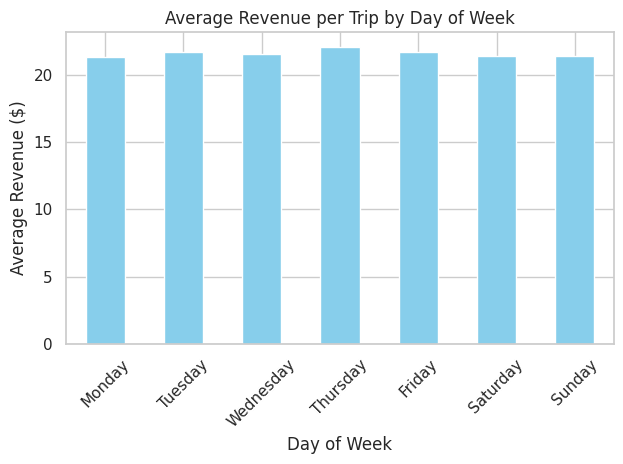

In [72]:
# Calculate average revenue per trip by day
dow_rev = trip_data.groupby('pickup_day')['total_amount'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot
dow_rev.plot(kind='bar', color='skyblue')
plt.title('Average Revenue per Trip by Day of Week')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

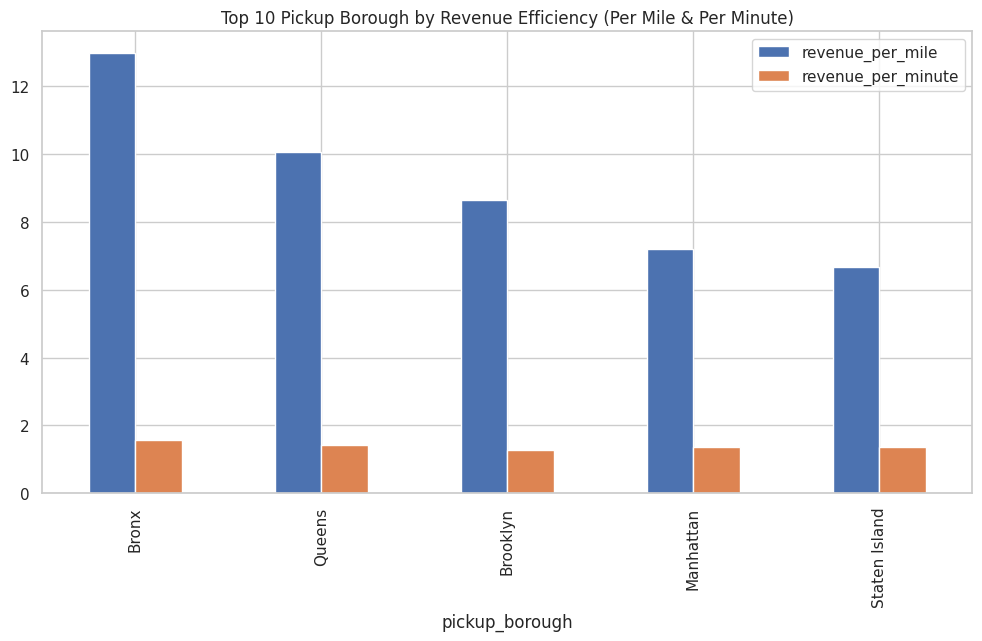

In [74]:
# Grouped metrics by pickup zone
zone_kpi = trip_data.groupby('pickup_borough')[['revenue_per_mile', 'revenue_per_minute']].mean()

# Select top 10 zones based on revenue per mile
zone_kpi = zone_kpi.sort_values('revenue_per_mile', ascending=False).head(10)

# Plot
zone_kpi.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Pickup Borough by Revenue Efficiency (Per Mile & Per Minute)')
plt

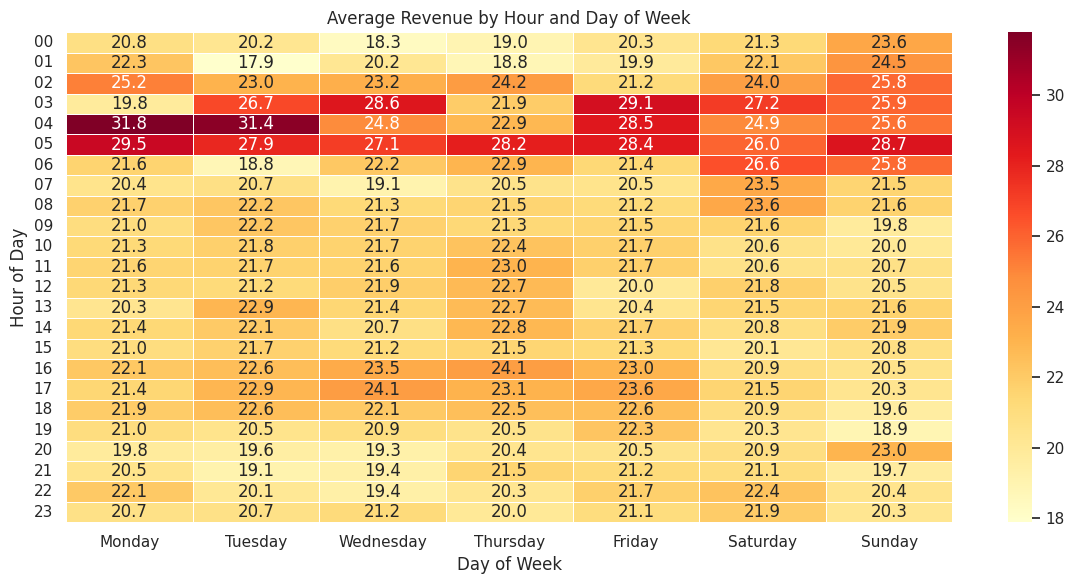

In [75]:
# Create pivot table for heatmap
heatmap_data = trip_data.pivot_table(
    values='total_amount',
    index='pickup_hour',
    columns='pickup_day',
    aggfunc='mean'
).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Average Revenue by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

###**Operational Efficiency Analysis**

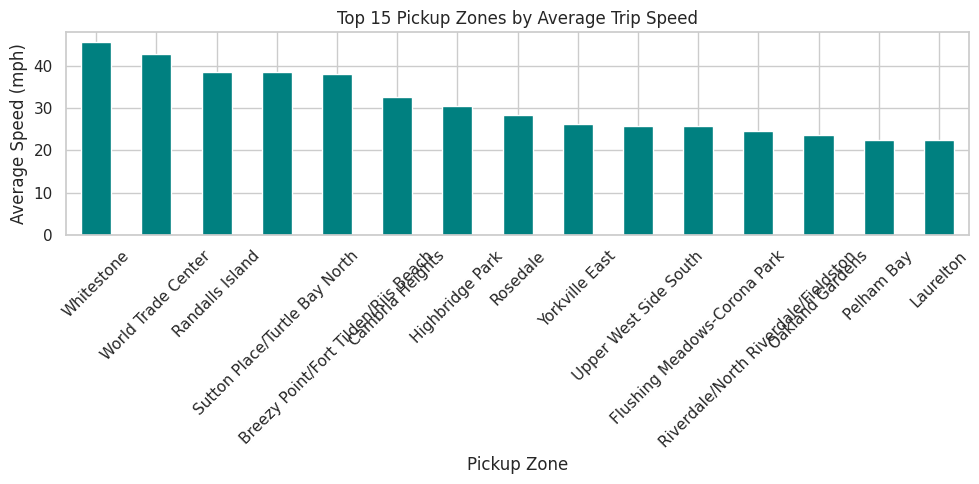

In [76]:
# Group by pickup zone and calculate average trip speed
zone_speed = trip_data.groupby('pickup_zone')['trip_speed_mph'].mean().sort_values(ascending=False).head(15)

# Plot
zone_speed.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title('Top 15 Pickup Zones by Average Trip Speed')
plt.ylabel('Average Speed (mph)')
plt.xlabel('Pickup Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

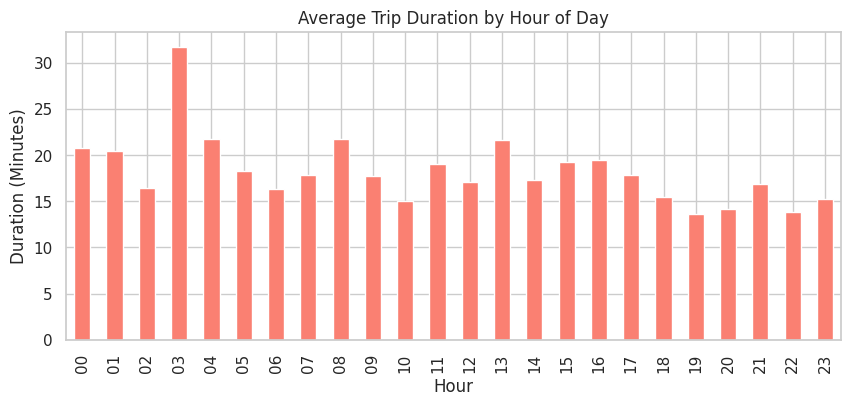

In [116]:
hour_duration = trip_data.groupby(trip_data['pickup_hour'])['durations_minute'].mean()

hour_duration.plot(kind='bar', figsize=(10,4), color='salmon')
plt.title('Average Trip Duration by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Duration (Minutes)')
plt.grid(True)
plt.show()

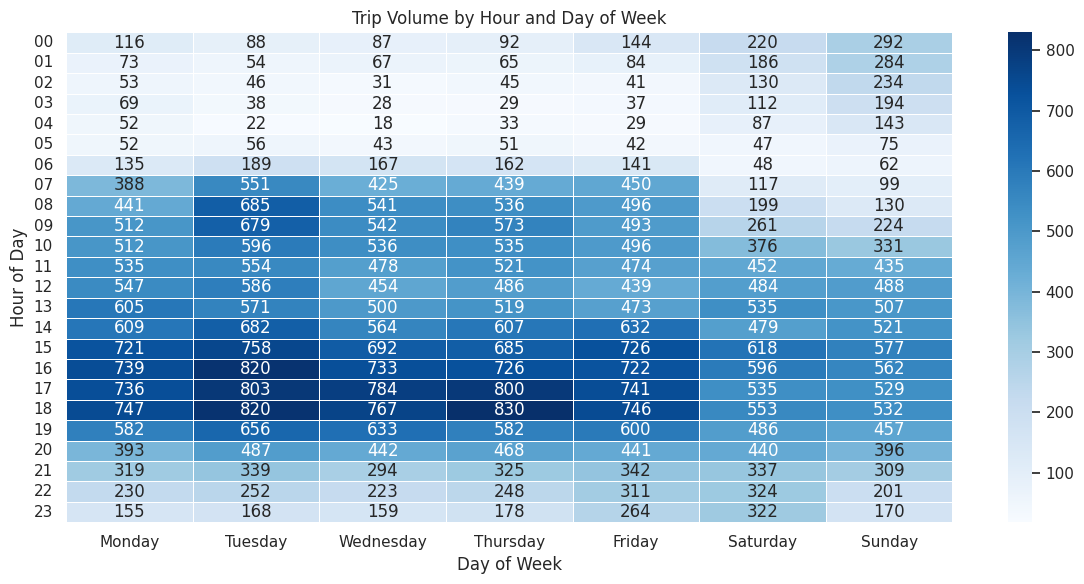

In [78]:
# Create pivot table
heatmap_count = trip_data.pivot_table(
    index='pickup_hour',
    columns='pickup_day',
    values='VendorID',  # Just needs a non-null field for counting
    aggfunc='count'
).reindex(columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_count, cmap='Blues', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Trip Volume by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.tight_layout()
plt.show()

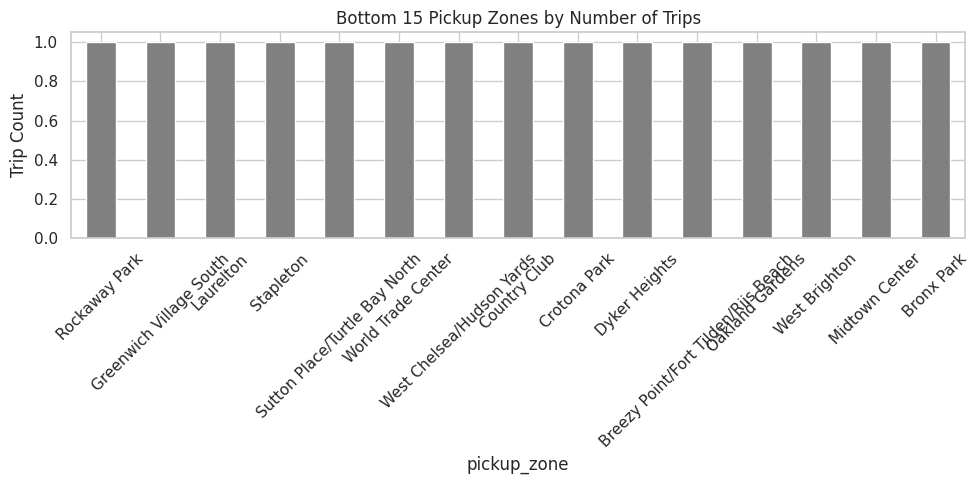

In [118]:
# Total trips by zone
zone_trip_count = trip_data['pickup_zone'].value_counts().sort_values()

zone_trip_count.head(15).plot(kind='bar', figsize=(10,5), color='gray')
plt.title('Bottom 15 Pickup Zones by Number of Trips')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [84]:
# Filter for potential idle trips
idle_trips = trip_data[(trip_data['trip_distance'] < 1) & (trip_data['durations_minute'] > 10)]

# Show how many
print("Potential Idle Trips:", idle_trips.shape[0])

# Display sample output
idle_trips[['pickup_zone', 'trip_distance', 'durations_minute', 'trip_speed_mph']].head()

Potential Idle Trips: 333


,pickup_zone,trip_distance,durations_minute,trip_speed_mph
207,Jackson Heights,0.72,1371.0,0.031510
806,DUMBO/Vinegar Hill,0.90,16.0,3.375000
817,Elmhurst,0.75,17.0,2.647059
928,DUMBO/Vinegar Hill,0.64,13.0,2.953846
1058,Elmhurst,0.90,13.0,4.153846


In [83]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63624 entries, 0 to 68210
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               63624 non-null  int64          
 1   lpep_pickup_datetime   63624 non-null  datetime64[ns] 
 2   lpep_dropoff_datetime  63624 non-null  datetime64[ns] 
 3   store_and_fwd_flag     63624 non-null  object         
 4   RatecodeID             63624 non-null  Int64          
 5   PULocationID           63624 non-null  int64          
 6   DOLocationID           63624 non-null  int64          
 7   passenger_count        63624 non-null  Int64          
 8   trip_distance          63624 non-null  float64        
 9   fare_amount            63624 non-null  float64        
 10  extra                  63624 non-null  float64        
 11  mta_tax                63624 non-null  float64        
 12  tip_amount             63624 non-null  float64     

####**Zone Pairing Analysis**

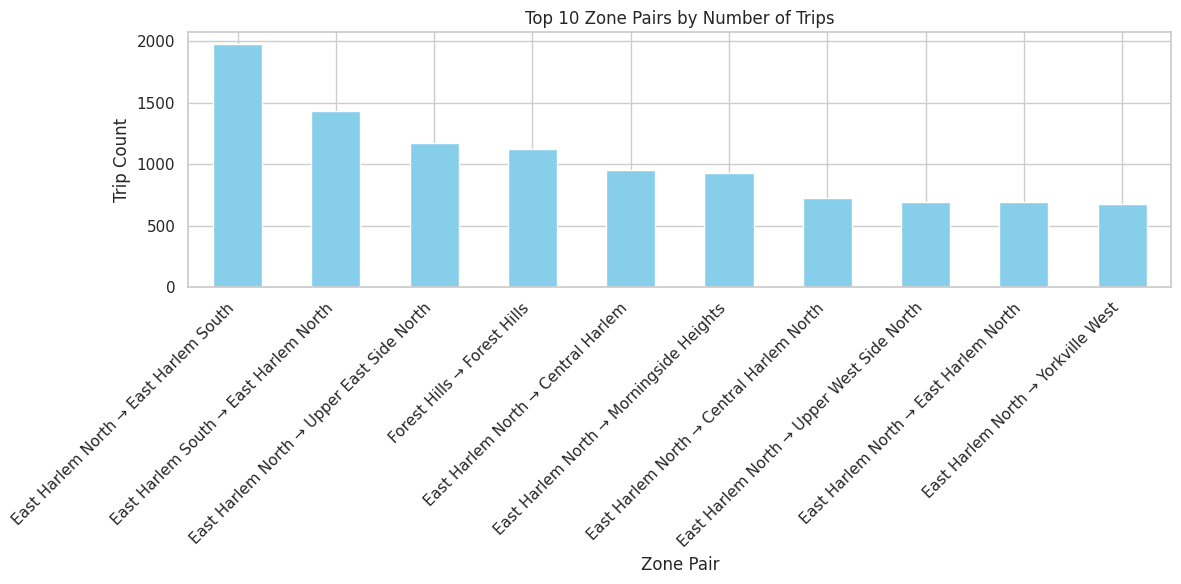

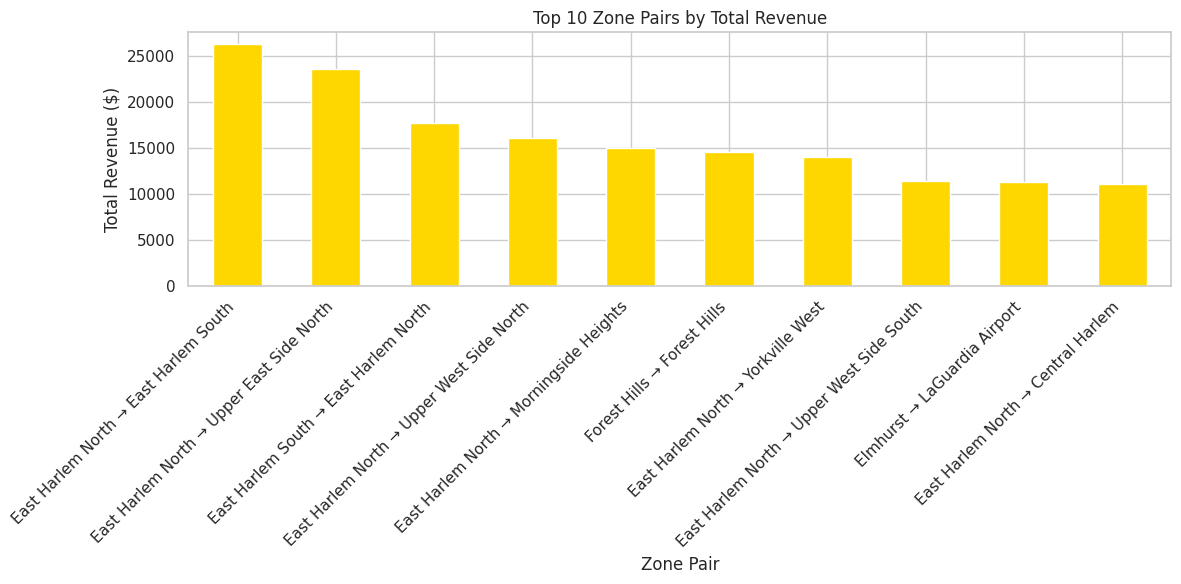

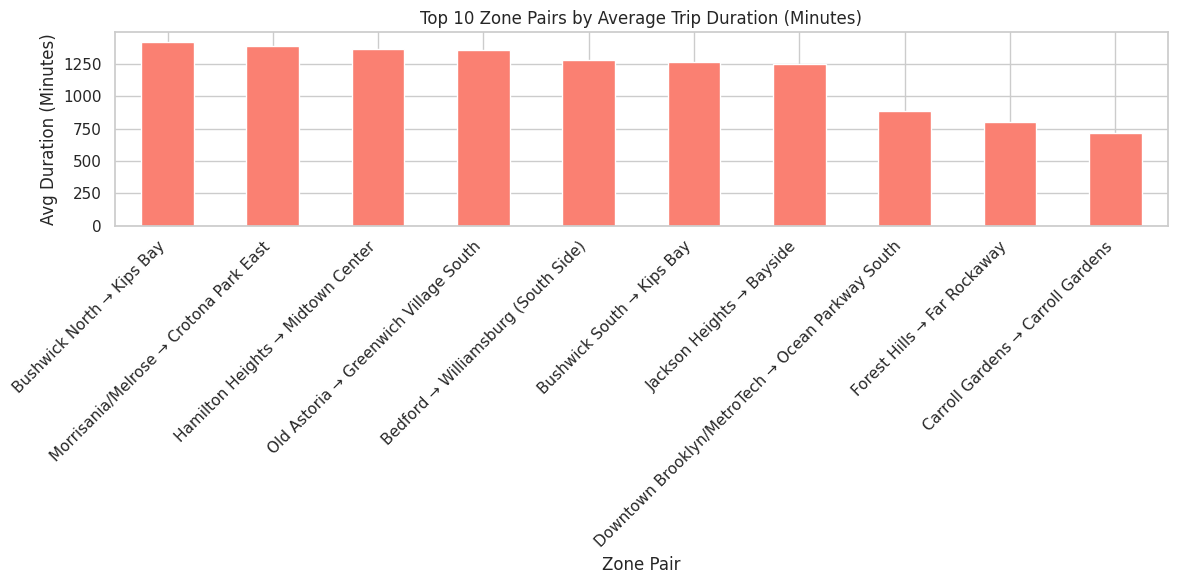

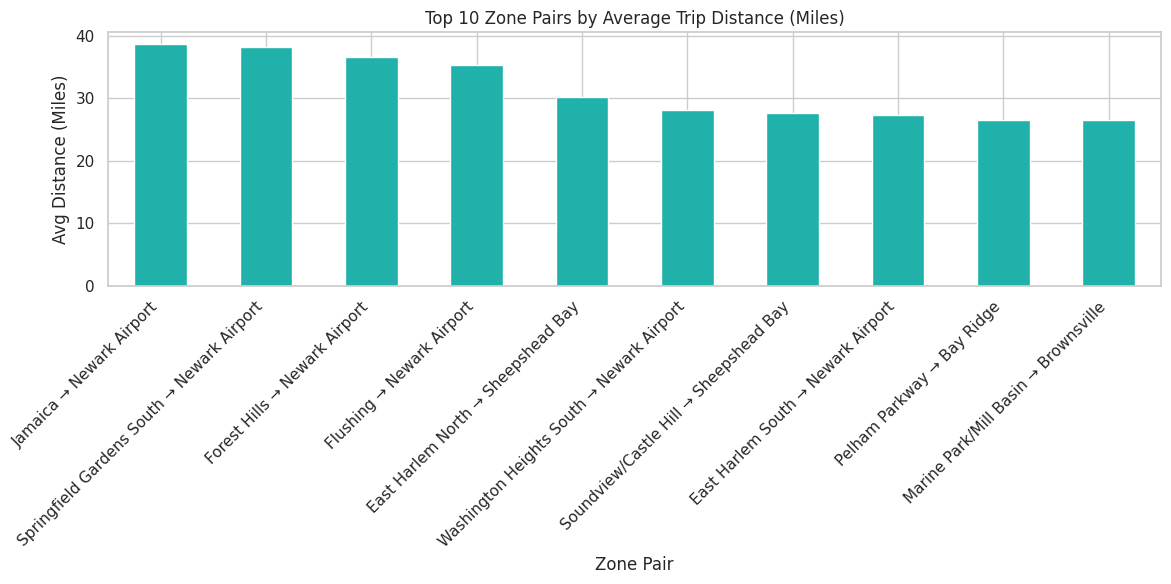

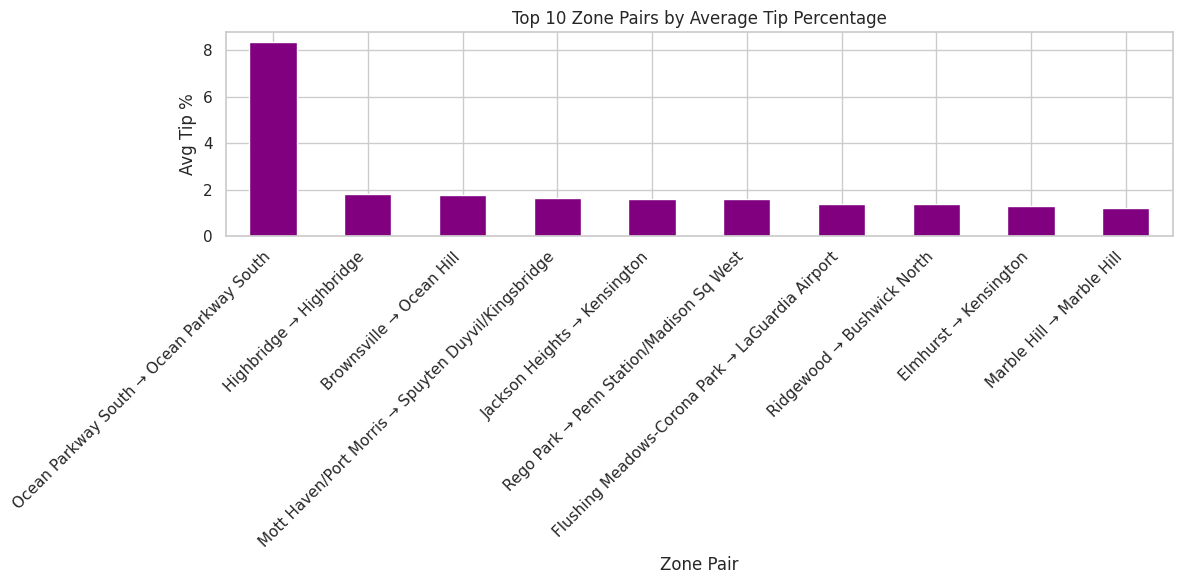

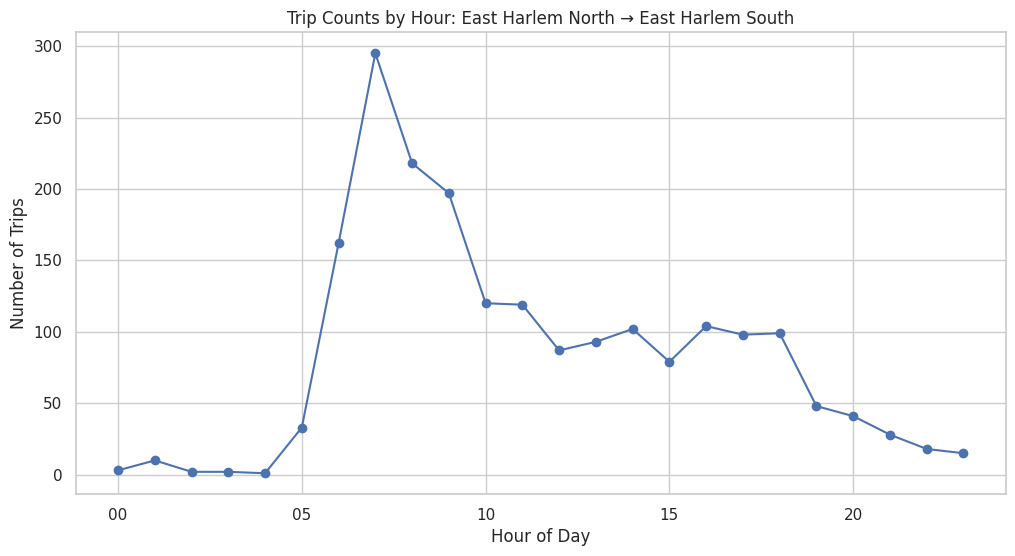

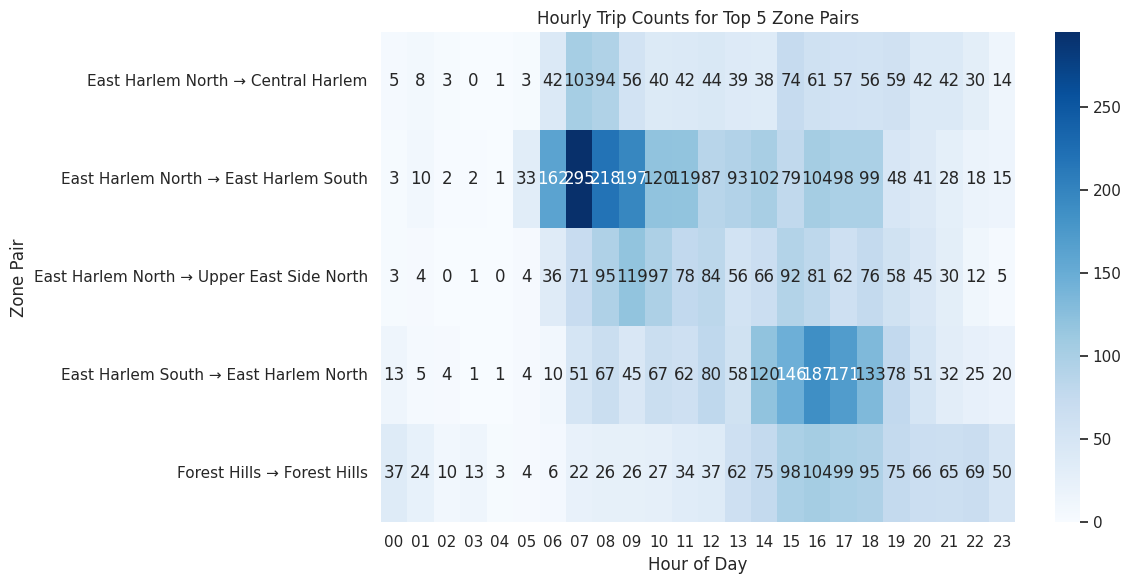

In [120]:
# 1. Top Zone Pairs by Trip Count
top_zone_pairs = trip_data['zone_pair'].value_counts().head(10)
plt.figure(figsize=(12,6))
top_zone_pairs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Zone Pairs by Number of Trips')
plt.xlabel('Zone Pair')
plt.ylabel('Trip Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 2. Revenue by Zone Pair (Top 10)
revenue_by_zone_pair = trip_data.groupby('zone_pair')['total_amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
revenue_by_zone_pair.plot(kind='bar', color='gold')
plt.title('Top 10 Zone Pairs by Total Revenue')
plt.xlabel('Zone Pair')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 3. Average Trip Duration by Zone Pair (Top 10)
avg_duration = trip_data.groupby('zone_pair')['durations_minute'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
avg_duration.plot(kind='bar', color='salmon')
plt.title('Top 10 Zone Pairs by Average Trip Duration (Minutes)')
plt.xlabel('Zone Pair')
plt.ylabel('Avg Duration (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Average Trip Distance by Zone Pair (Top 10)
avg_distance = trip_data.groupby('zone_pair')['trip_distance'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
avg_distance.plot(kind='bar', color='lightseagreen')
plt.title('Top 10 Zone Pairs by Average Trip Distance (Miles)')
plt.xlabel('Zone Pair')
plt.ylabel('Avg Distance (Miles)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Tip Percentage by Zone Pair (Top 10)
trip_data['tip_pct'] = trip_data['tip_amount'] / trip_data['fare_amount']
avg_tip_pct = trip_data.groupby('zone_pair')['tip_pct'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
avg_tip_pct.plot(kind='bar', color='purple')
plt.title('Top 10 Zone Pairs by Average Tip Percentage')
plt.xlabel('Zone Pair')
plt.ylabel('Avg Tip %')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 5. Time-based Patterns on Zone Pair (East Harlem North → East Harlem South)
example_pair = 'East Harlem North → East Harlem South'

zone_time = trip_data.groupby(['zone_pair', 'pickup_hour']).size().unstack(fill_value=0)
if example_pair in zone_time.index:
    plt.figure(figsize=(12,6))
    zone_time.loc[example_pair].plot(kind='line', marker='o')
    plt.title(f'Trip Counts by Hour: {example_pair}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Trips')
    plt.grid(True)
    plt.show()
else:
    print(f"Zone pair '{example_pair}' not found in data.")


# 6. Bonus: Heatmap of top 5 zone pairs hourly trip counts
top_5_zone_pairs = top_zone_pairs.index[:5]
heatmap_data = trip_data[trip_data['zone_pair'].isin(top_5_zone_pairs)].groupby(['zone_pair','pickup_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Hourly Trip Counts for Top 5 Zone Pairs')
plt.xlabel('Hour of Day')
plt.ylabel('Zone Pair')
plt.tight_layout()
plt.show()

####**Weekend vs Weekday**

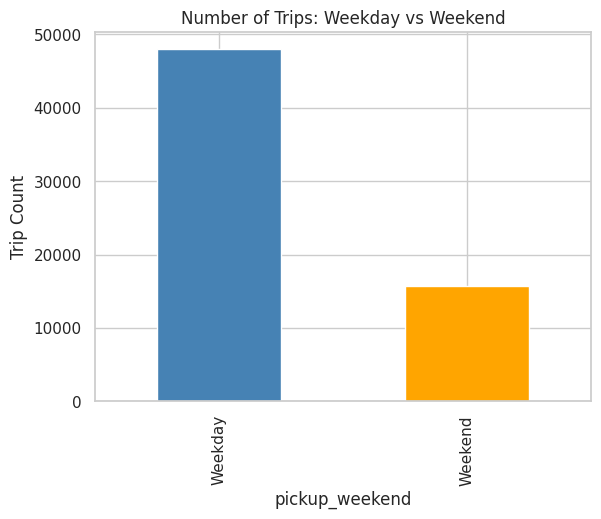

In [90]:
trip_counts = trip_data['pickup_weekend'].value_counts().rename({0:'Weekday', 1:'Weekend'})

trip_counts.plot(kind='bar', color=['steelblue', 'orange'])
plt.title('Number of Trips: Weekday vs Weekend')
plt.ylabel('Trip Count')
plt.show()


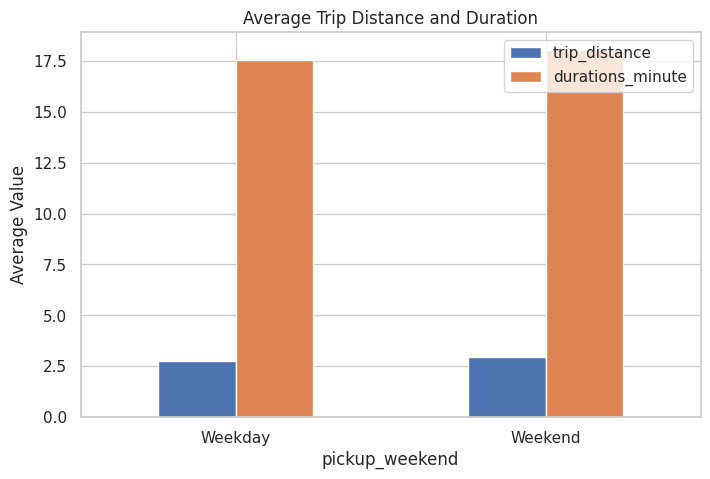

In [92]:
avg_metrics = trip_data.groupby('pickup_weekend')[['trip_distance', 'durations_minute']].mean().rename(index={0:'Weekday', 1:'Weekend'})
avg_metrics.plot(kind='bar', figsize=(8,5))
plt.title('Average Trip Distance and Duration')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()

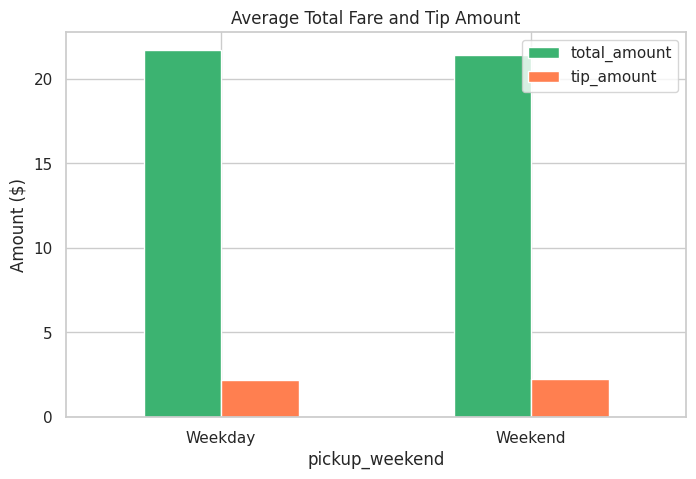

In [93]:
avg_fares = trip_data.groupby('pickup_weekend')[['total_amount', 'tip_amount']].mean().rename(index={0:'Weekday', 1:'Weekend'})
avg_fares.plot(kind='bar', figsize=(8,5), color=['mediumseagreen', 'coral'])
plt.title('Average Total Fare and Tip Amount')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.show()

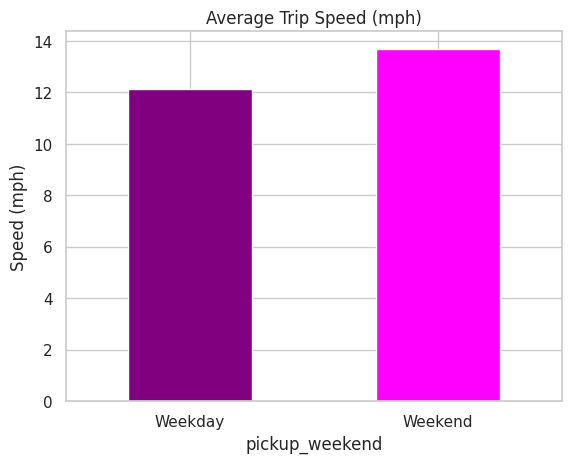

In [95]:
avg_speed = trip_data.groupby('pickup_weekend')['trip_speed_mph'].mean().rename({0:'Weekday', 1:'Weekend'})

avg_speed.plot(kind='bar', color=['purple', 'magenta'])
plt.title('Average Trip Speed (mph)')
plt.ylabel('Speed (mph)')
plt.xticks(rotation=0)
plt.show()

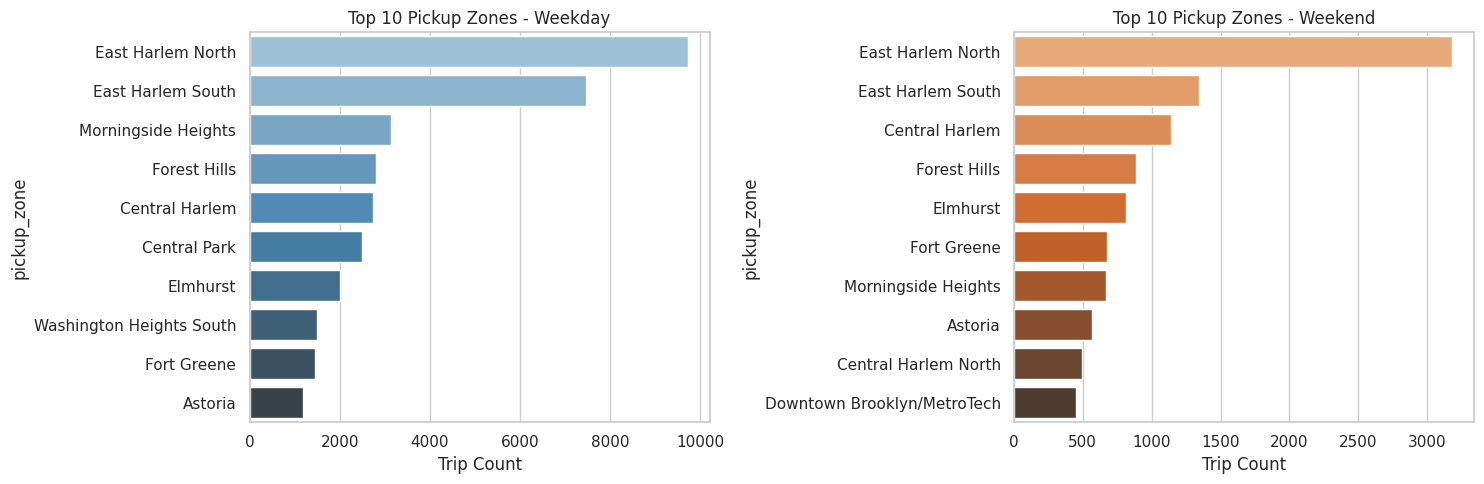

In [96]:
top_weekday_zones = trip_data[trip_data['pickup_weekend'] == 0]['pickup_zone'].value_counts().head(10)
top_weekend_zones = trip_data[trip_data['pickup_weekend'] == 1]['pickup_zone'].value_counts().head(10)

fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(x=top_weekday_zones.values, y=top_weekday_zones.index, ax=axs[0], palette='Blues_d')
axs[0].set_title('Top 10 Pickup Zones - Weekday')
axs[0].set_xlabel('Trip Count')

sns.barplot(x=top_weekend_zones.values, y=top_weekend_zones.index, ax=axs[1], palette='Oranges_d')
axs[1].set_title('Top 10 Pickup Zones - Weekend')
axs[1].set_xlabel('Trip Count')

plt.tight_layout()
plt.show()


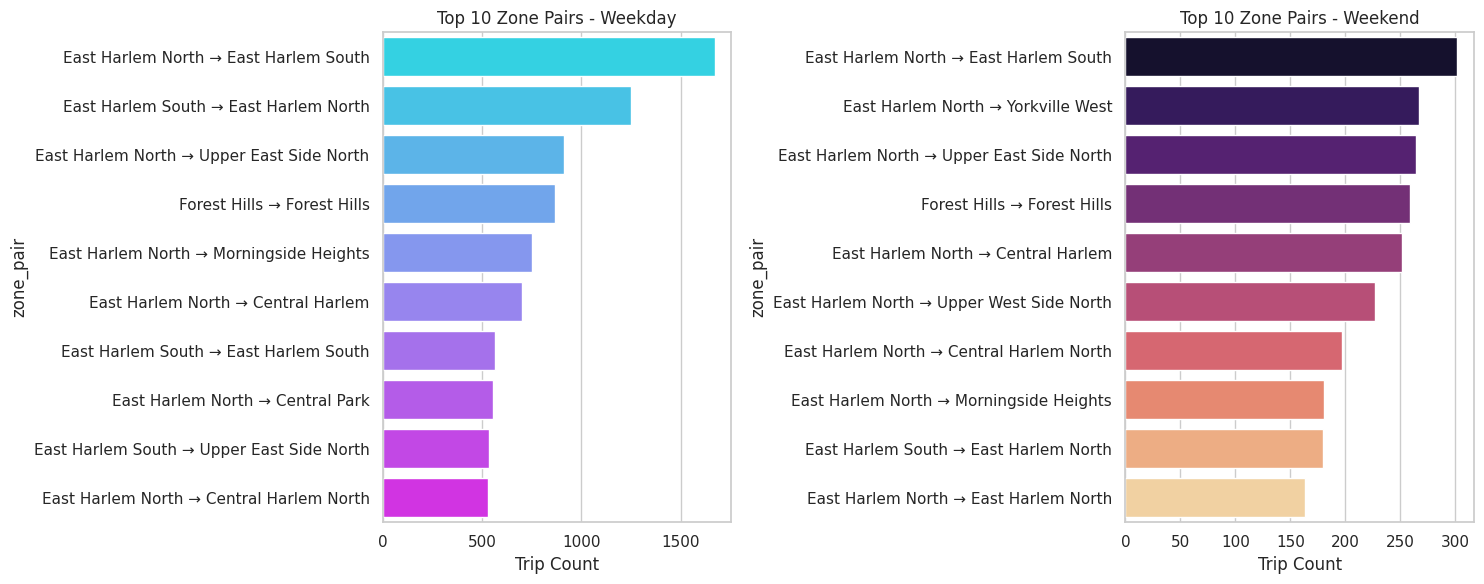

In [99]:
top_weekday_pairs = trip_data[trip_data['pickup_weekend'] == 0]['zone_pair'].value_counts().head(10)
top_weekend_pairs = trip_data[trip_data['pickup_weekend'] == 1]['zone_pair'].value_counts().head(10)

fig, axs = plt.subplots(1, 2, figsize=(15,6))

sns.barplot(x=top_weekday_pairs.values, y=top_weekday_pairs.index, ax=axs[0], palette='cool')
axs[0].set_title('Top 10 Zone Pairs - Weekday')
axs[0].set_xlabel('Trip Count')

sns.barplot(x=top_weekend_pairs.values, y=top_weekend_pairs.index, ax=axs[1], palette='magma')
axs[1].set_title('Top 10 Zone Pairs - Weekend')
axs[1].set_xlabel('Trip Count')

plt.tight_layout()
plt.show()

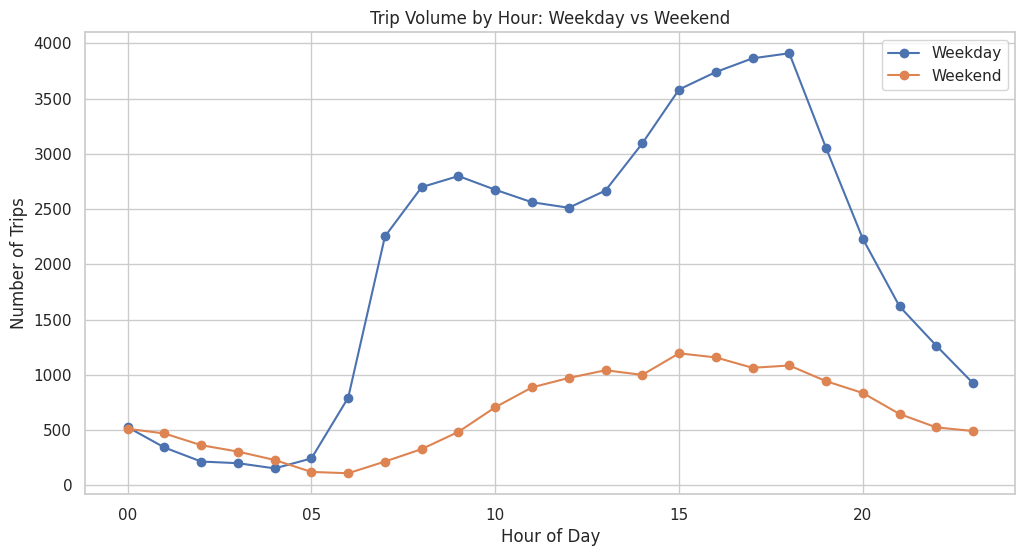

In [104]:
# 9. Trip volume by hour for weekend and weekday
hourly_counts = trip_data.groupby(['pickup_weekend'], trip_data['pickup_hour).size().unstack(level=0).fillna(0)
hourly_counts.columns = ['Weekday', 'Weekend']

hourly_counts.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Trip Volume by Hour: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

Borough

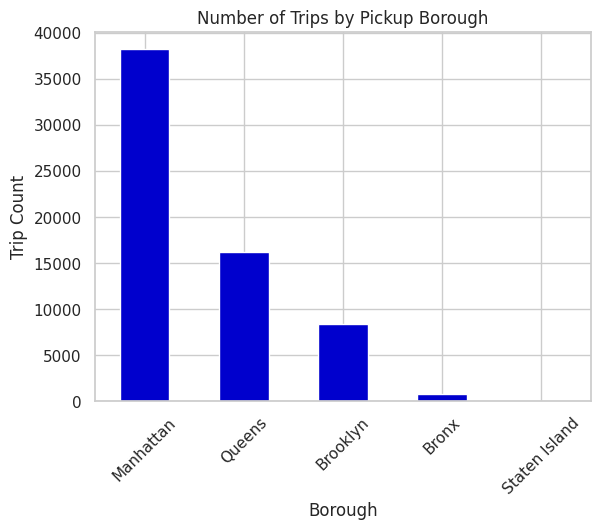

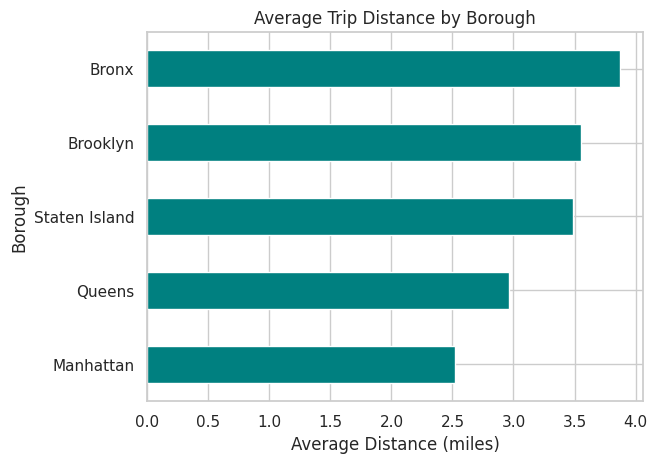

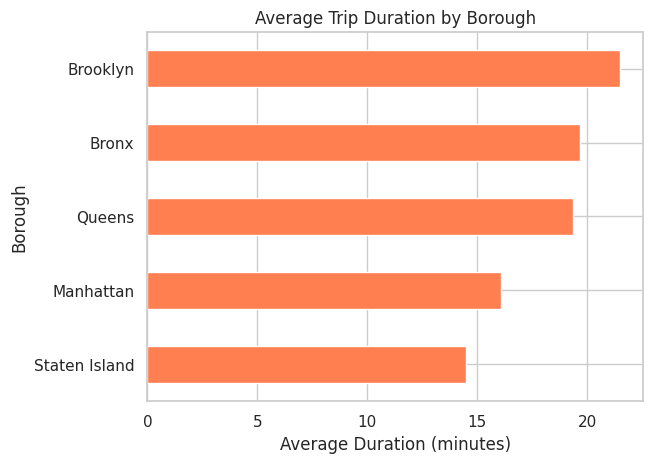

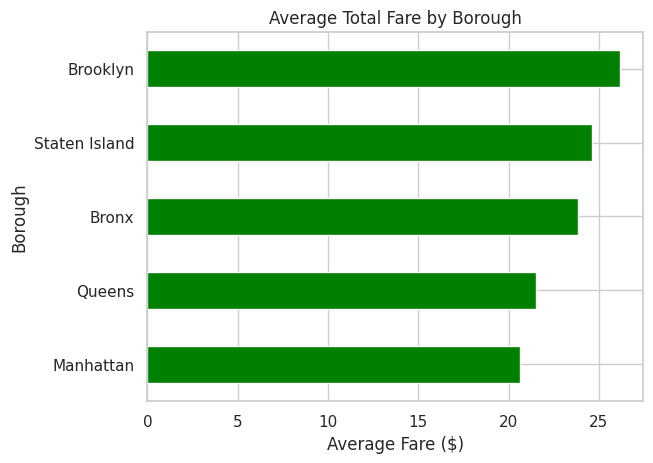

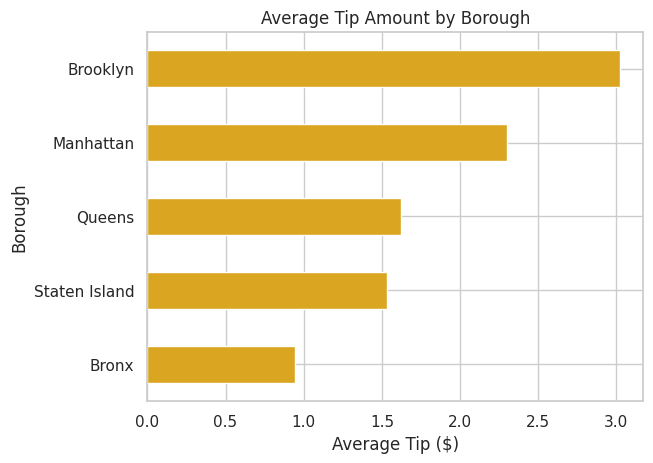

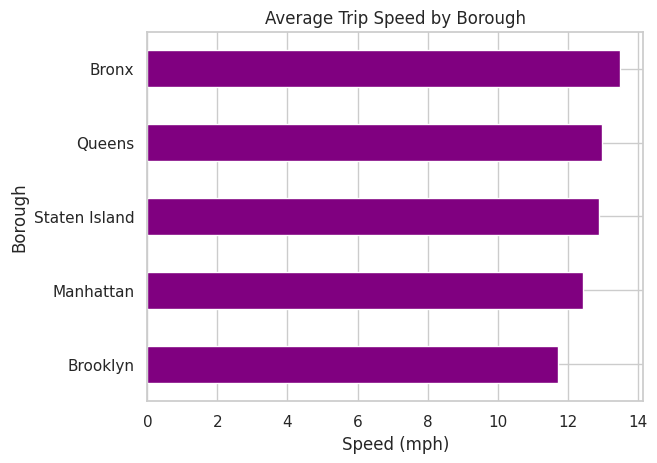

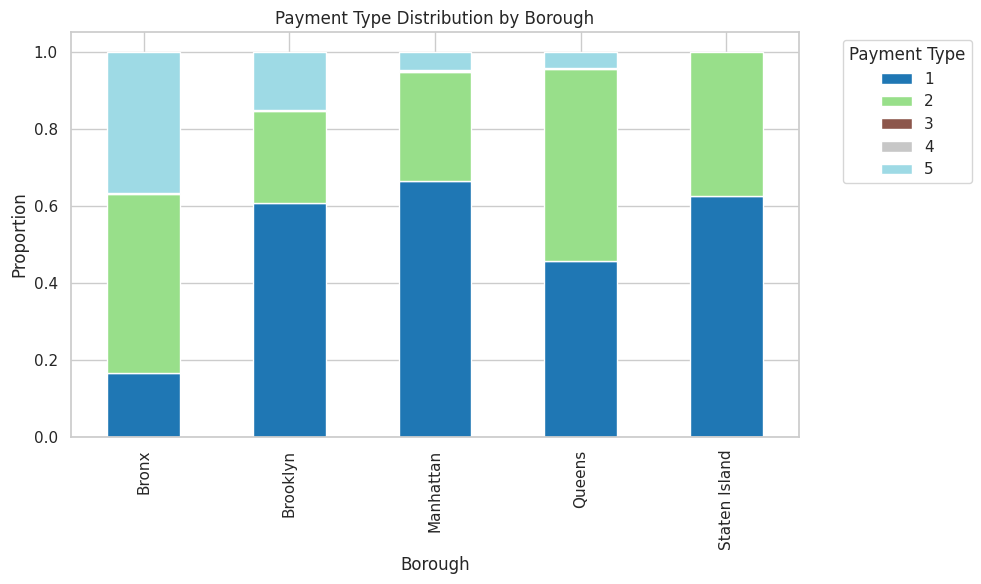

In [110]:
# 1. Trip counts by borough
trip_counts = trip_data['pickup_borough'].value_counts()
trip_counts.plot(kind='bar', color='mediumblue')
plt.title('Number of Trips by Pickup Borough')
plt.xlabel('Borough')
plt.ylabel('Trip Count')
plt.xticks(rotation=45)
plt.show()

# 2. Average trip distance by borough
avg_distance = trip_data.groupby('pickup_borough')['trip_distance'].mean().sort_values()
avg_distance.plot(kind='barh', color='teal')
plt.title('Average Trip Distance by Borough')
plt.xlabel('Average Distance (miles)')
plt.ylabel('Borough')
plt.show()

# 3. Average trip duration by borough
avg_duration = trip_data.groupby('pickup_borough')['durations_minute'].mean().sort_values()
avg_duration.plot(kind='barh', color='coral')
plt.title('Average Trip Duration by Borough')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Borough')
plt.show()

# 4. Average total fare by borough
avg_fare = trip_data.groupby('pickup_borough')['total_amount'].mean().sort_values()
avg_fare.plot(kind='barh', color='green')
plt.title('Average Total Fare by Borough')
plt.xlabel('Average Fare ($)')
plt.ylabel('Borough')
plt.show()

# 5. Average tip amount by borough
avg_tip = trip_data.groupby('pickup_borough')['tip_amount'].mean().sort_values()
avg_tip.plot(kind='barh', color='goldenrod')
plt.title('Average Tip Amount by Borough')
plt.xlabel('Average Tip ($)')
plt.ylabel('Borough')
plt.show()

# 6. Average trip speed by borough
avg_speed = trip_data.groupby('pickup_borough')['trip_speed_mph'].mean().sort_values()
avg_speed.plot(kind='barh', color='purple')
plt.title('Average Trip Speed by Borough')
plt.xlabel('Speed (mph)')
plt.ylabel('Borough')
plt.show()

# 7. Payment type distribution by borough (stacked bar)
payment_borough = trip_data.groupby(['pickup_borough', 'payment_type']).size().unstack(fill_value=0)
payment_borough_percent = payment_borough.div(payment_borough.sum(axis=1), axis=0)

payment_borough_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20')
plt.title('Payment Type Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Proportion')
plt.legend(title='Payment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

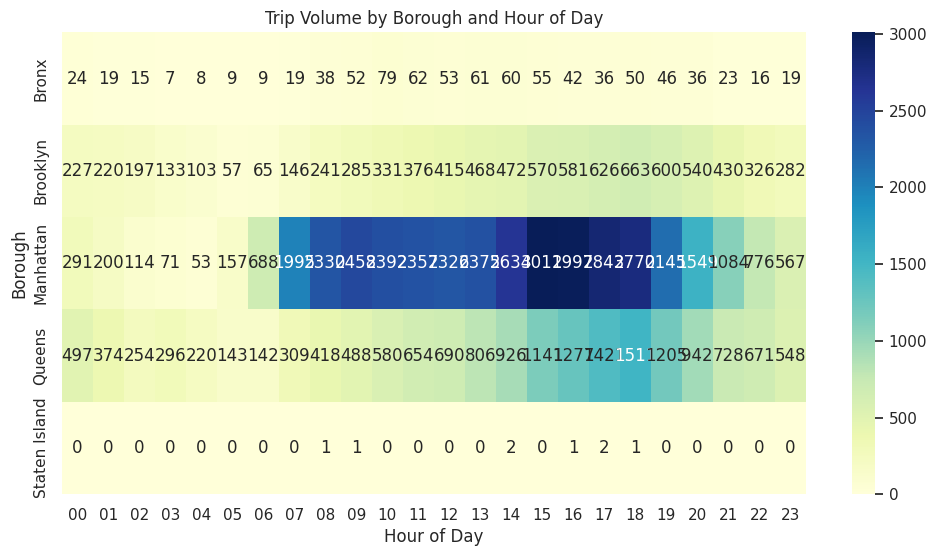

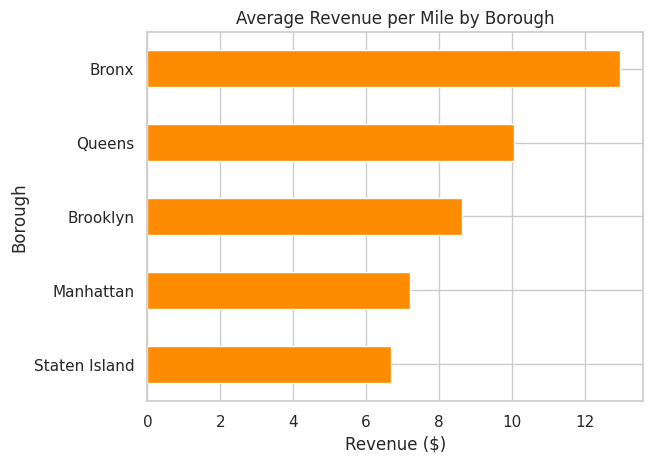

In [113]:
# 8. Trip count by borough and hour heatmap
heatmap_data = trip_data.groupby(['pickup_borough', 'pickup_hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Trip Volume by Borough and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Borough')
plt.show()

# 9. Average revenue per mile by borough
rev_per_mile = trip_data.groupby('pickup_borough')['revenue_per_mile'].mean().sort_values()
rev_per_mile.plot(kind='barh', color='darkorange')
plt.title('Average Revenue per Mile by Borough')
plt.xlabel('Revenue ($)')
plt.ylabel('Borough')
plt.show()